# RiscV sem Forward com unidade de Hazard

* Desvio 4 estágio
* Unidade de Hazard trata dependências considerando rs1 e rs2 para instruções ALU, ALU com Rs1 e Imediato, Lw/Sw e Branches

## Instruções suportadas

Descreva aqui quais instruções são suportadas pelo seu processador. Voce deverá adicionar ad instruçoes destacadas com //:

* lw Rd, Im(Rs1)
* sw Rs2, Im(Rs1)
* bne, blt, bge,bltu, bgeu Rs1, Rs2, label
* // beq, Rs1, Rs2, label //
* add Rd, Rs1, Rs2  e addi Rd, Rs1, Im
* sub Rd, Rs1, Rs2
* and Rd, Rs1, Rs2
* // andi Rd, Rs1, Rs2 //
* or Rd, Rs1, Rs2   e ori
* nor Rd, Rs1, Rs2  e nori
* xor Rd, Rs1, Rs2  e xor i
* slt Rd, Rs1, Rs2  e slt i
* sll Rd, Rs1, Rs2 e slli
* slr Rd,Rs1, Rs2 e slri
* // mul Rd, Rs1, Rs2 //
* // div Rd, Rs1, Rs2 //


# Assembly

In [ ]:
%%writefile instructions.txt
nop
addi x1, x0, 1
addi x2, x2, 2
add x3, x1, x2
beq x1, x3, end
end: nop

Writing instructions.txt


In [ ]:
# https://datagy.io/python-int-to-binary/#:~:text=If%20you're%20wanting%20to,convert%20an%20integer%20to%20binary.
# https://stackoverflow.com/questions/2072351/python-conversion-from-binary-string-to-hexadecimal
# https://stackoverflow.com/questions/339007/how-do-i-pad-a-string-with-zeroes

# consulta: Guia prático RISC-V Atlas de uma Arquitetura Aberta Primeira edição, 1.0.0
register_numbers = {
    'x0' : 0,
    'zero': 0,
    'x1' : 1,
    'ra': 1,
    'x2' : 2,
    'sp' : 2,
    'x3' : 3,
    'gp' : 3,
    'x4' : 4,
    'tp' : 4,
    'x5' : 5,
    't0' : 5,
    'x6' : 6,
    't1' : 6,
    'x7' : 7,
    't2' : 7,
    'x8' : 8,
    's0' : 8,
    'fp' : 8,
    'x9' : 9,
    's1' : 9,
    'x10' : 10,
    'a0' : 10,
    'x11' : 11,
    'a1' : 11,
    'x12' : 12,
    'a2' : 12,
    'x13' : 13,
    'a3' : 13,
    'x14' : 14,
    'a4' : 14,
    'x15' : 15,
    'a5' : 15,
    'x16' : 16,
    'a6' : 16,
    'x17' : 17,
    'a7' : 17,
    'x18' : 18,
    's2' : 18,
    'x19' : 19,
    's3' : 19,
    'x20' : 20,
    's4' : 20,
    'x21' : 21,
    's5' : 21,
    'x22' : 22,
    's6' : 22,
    'x23' : 23,
    's7' : 23,
    'x24' : 24,
    's8' : 24,
    'x25' : 25,
    's9' : 25,
    'x26' : 26,
    's10' : 26,
    'x27' : 27,
    's11' : 27,
    'x28' : 28,
    't3' : 28,
    'x29' : 29,
    't4' : 29,
    'x30' : 30,
    't5' : 30,
    'x31' : 31,
    't6' : 31
}

instruction_format = {
    'lui': 'U',
    'auipc': 'U',
    'jal': 'J',
    'jalr': 'I',
    'beq': 'B',
    'bne': 'B',
    'blt': 'B',
    'bge': 'B',
    'bltu': 'B',
    'bgeu': 'B',
    'lb': 'I',
    'lh': 'I',
    'lw': 'I',
    'lbu': 'I',
    'lhu': 'I',
    'sb': 'S',
    'sh': 'S',
    'sw': 'S',
    'addi': 'I',
    'slti': 'I',
    'sltiu': 'I',
    'xori': 'I',
    'ori': 'I',
    'andi': 'I',
    'slli': 'I',
    'srli': 'I',
    'srai': 'I',
    'add': 'R',
    'sub': 'R',
    'sll': 'R',
    'slt': 'R',
    'sltu': 'R',
    'xor': 'R',
    'srl': 'R',
    'sra': 'R',
    'or': 'R',
    'and': 'R',
    'fence': 'I',
    'fence.i': 'I',
    'ecall': 'I',
    'ebreak': 'I',
    'csrrw': 'I',
    'csrrs': 'I',
    'csrrc': 'I',
    'csrrwi': 'I',
    'csrrsi': 'I',
    'csrrci': 'I'
}

instruction_opcode = {
    'lui': '0110111',
    'auipc': '0010111',
    'jal': '1101111',
    'jalr': '1100111',
    'beq': '1100011',
    'bne': '1100011',
    'blt': '1100011',
    'bge': '1100011',
    'bltu': '1100011',
    'bgeu': '1100011',
    'lb': '0000011',
    'lh': '0000011',
    'lw': '0000011',
    'lbu': '0000011',
    'lhu': '0000011',
    'sb': '0100011',
    'sh': '0100011',
    'sw': '0100011',
    'addi': '0010011',
    'slti': '0010011',
    'sltiu': '0010011',
    'xori': '0010011',
    'ori': '0010011',
    'andi': '0010011',
    'slli': '0010011',
    'srli': '0010011',
    'srai': '0010011',
    'add': '0110011',
    'sub': '0110011',
    'sll': '0110011',
    'slt': '0110011',
    'sltu': '0110011',
    'xor': '0110011',
    'srl': '0110011',
    'sra': '0110011',
    'or': '0110011',
    'and': '0110011',
    'fence': '0001111',
    'fence.i': '0001111',
    'ecall': '1110011',
    'ebreak': '1110011',
    'csrrw': '1110011',
    'csrrs': '1110011',
    'csrrc': '1110011',
    'csrrwi': '1110011',
    'csrrsi': '1110011',
    'csrrci': '1110011'
}

instruction_funct3 = {
    'jalr': '000',
    'beq': '000',
    'bne': '001',
    'blt': '100',
    'bge': '101',
    'bltu': '110',
    'bgeu': '111',
    'lb': '000',
    'lh': '001',
    'lw': '010',
    'lbu': '100',
    'lhu': '101',
    'sb': '000',
    'sh': '001',
    'sw': '010',
    'addi': '000',
    'slti': '010',
    'sltiu': '011',
    'xori': '100',
    'ori': '110',
    'andi': '111',
    'slli': '001',
    'srli': '101',
    'srai': '101',
    'add': '000',
    'sub': '000',
    'sll': '001',
    'slt': '010',
    'sltu': '011',
    'xor': '100',
    'srl': '101',
    'sra': '101',
    'or': '110',
    'and': '111',
    'fence': '000',
    'fence.i': '001',
    'ecall': '000',
    'ebreak': '000',
    'csrrw': '001',
    'csrrs': '010',
    'csrrc': '011',
    'csrrwi': '101',
    'csrrsi': '110',
    'csrrci': '111',
}

instruction_funct7 = {
    'slli': '0000000',
    'srli': '0000000',
    'srai': '0100000',
    'add': '0000000',
    'sub': '0100000',
    'sll': '0000000',
    'slt': '0000000',
    'sltu': '0000000',
    'xor': '0000000',
    'srl': '0000000',
    'sra': '0100000',
    'or': '0000000',
    'and': '0000000',
}

labels = {}

def divide_one(line):
  return line.split(' ', 1)

def divide(lines):
  divided_lines = []
  for line in lines:
    divided_lines.append(divide_one(line))
  return divided_lines

def normalize_one(divided_line):
  if len(divided_line) == 1:
    divided_line = divide_one('addi x0, x0, 0')
  return divided_line

def normalize(divided_lines):
    normalized_lines = []
    for line in divided_lines:
      normalized_lines.append(normalize_one(line))
    return normalized_lines

def tokenize(content):
  content = content.replace(' ', '')
  return content.split(',')

def r_type(pc, instruction, content):
  opcode = instruction_opcode[instruction]
  rd = '{0:b}'.format(register_numbers[content[0]]).rjust(5,'0')
  funct3 = instruction_funct3[instruction]
  rs1 = '{0:b}'.format(register_numbers[content[1]]).rjust(5,'0')
  rs2 = '{0:b}'.format(register_numbers[content[2]]).rjust(5,'0')
  funct7 = funct3 = instruction_funct7[instruction]

  code = funct7 + rs2 + rs1 + funct3 + rd + opcode
  return hex(int(code, 2))

def i_type(pc, instruction, content):
  imm = '{0:b}'.format(int(content[2])).rjust(12,'0')

  opcode = instruction_opcode[instruction]
  rd = '{0:b}'.format(register_numbers[content[0]]).rjust(5,'0')
  funct3 = instruction_funct3[instruction]
  rs1 = '{0:b}'.format(register_numbers[content[1]]).rjust(5,'0')
  imm11_0 = imm

  code = imm11_0 + rs1 + funct3 + rd + opcode
  return hex(int(code, 2))

def s_type(pc, instruction, content):
  imm = '{0:b}'.format(int(content[2])).rjust(12,'0')

  opcode = instruction_opcode[instruction]
  imm4_0 = imm[7:]
  funct3 = instruction_funct3[instruction]
  rs1 = '{0:b}'.format(register_numbers[content[0]]).rjust(5,'0')
  rs2 = '{0:b}'.format(register_numbers[content[1]]).rjust(5,'0')
  imm11_5 = imm[0:7]

  code = imm11_5 + rs2 + rs1 + funct3 + imm4_0 + opcode
  return hex(int(code, 2))

def b_type(pc, instruction, content):
  label = ''
  if (content[2].isdigit()):
    label = content[2]
  else:
    label = str(labels[content[2]] - pc)

  imm = '{0:b}'.format(int(label)).rjust(12,'0')

  opcode = instruction_opcode[instruction]
  imm11 = imm[1]
  imm4_1 = imm[8:12]
  funct3 = instruction_funct3[instruction]
  rs1 = '{0:b}'.format(register_numbers[content[0]]).rjust(5,'0')
  rs2 = '{0:b}'.format(register_numbers[content[1]]).rjust(5,'0')
  imm10_5 = imm[2:8]
  imm12 = imm[0]

  code = imm12 + imm10_5 + rs2 + rs1 + funct3 + imm4_1 + imm11 + opcode
  return hex(int(code, 2))

def u_type(pc, instruction, content):
  imm = '{0:b}'.format(int(content[2])).rjust(20,'0')

  opcode = instruction_opcode[instruction]
  rd = '{0:b}'.format(register_numbers[content[0]]).rjust(5,'0')
  imm31_12 = '{0:b}'.format(int(content[2])).rjust(20,'0')

  code = imm31_12 + rd + opcode
  return hex(int(code, 2))

def j_type(pc, instruction, content):
  imm = '{0:b}'.format(int(content[2])).rjust(20,'0')

  opcode = instruction_opcode[instruction]
  rd = '{0:b}'.format(register_numbers[content[0]]).rjust(5,'0')
  imm19_12 = imm[1:10]
  imm11 = imm[10]
  imm10_1 = imm[11:20]
  imm20 = imm[0]

  code = imm20 + imm10_1 + imm11 + imm19_12 + rd + opcode
  return hex(int(code, 2))

def assemble_one(normalized_line, pc):
  instruction = normalized_line[0]
  content = normalized_line[1]
  content = tokenize(content)
  if instruction_format[instruction] == 'R':
      return r_type(pc, instruction, content)
  elif instruction_format[instruction] == 'I':
      return i_type(pc, instruction, content)
  elif instruction_format[instruction] == 'S':
      return s_type(pc, instruction, content)
  elif instruction_format[instruction] == 'B':
      return b_type(pc, instruction, content)
  elif instruction_format[instruction] == 'U':
      return u_type(pc, instruction, content)
  elif instruction_format[instruction] == 'J':
      return j_type(pc, instruction, content)

def assemble(normalized_lines):
  machine_codes  = []
  for i in range(len(normalized_lines)):
    machine_codes.append(assemble_one(normalized_lines[i], 4*i))
  return machine_codes

def read_file():
  file_name = "instructions.txt"
  f = open(file_name, "r")

  lines = []
  for line in f:
    # line = line.lower()
    line = line.strip('\n')
    line = line.rstrip(' ')
    if len(line) > 0:
      lines.append(line)
  f.close()
  return lines

def join_labels(lines):
  for i in range(1, len(lines)):
    if(lines[i - 1].endswith(':')):
      parts = lines[i - 1].split(':')
      lines[i] = parts[0] + ': ' + lines[i]
  return lines

def remove_slabels(lines):
  new_lines = []
  for i in range(len(lines)):
    if (not lines[i].endswith(':')):
      new_lines.append(lines[i])
  return new_lines

def remove_labels(lines):
  for i in range(len(lines)):
    if (lines[i].find(':') != -1):
      parts = lines[i].split(':')
      lines[i] = parts[1].lstrip()
  return lines

def set_labels(lines):
  for i in range(len(lines)):
    parts = lines[i].split(':', 1)
    if(len(parts) == 2):
      labels[parts[0]] = 4*i

def low_lines(lines):
  new_lines = []
  for line in lines:
    line = line.lower()
    new_lines.append(line)
  return new_lines

def assembler():
  lines = read_file()
  lines = join_labels(lines)
  lines = remove_slabels(lines)
  set_labels(lines)
  lines = remove_labels(lines)
  lines = low_lines(lines)
  divided_lines = divide(lines)
  normalized_lines = normalize(divided_lines)
  machine_codes = assemble(normalized_lines)
  return machine_codes

machine_codes = assembler()
print(machine_codes)

['0x13', '0x100093', '0x210113', '0x20801b3', '0x308463', '0x13']


# Instalação de extensões

In [ ]:
!pip install git+https://github.com/lesc-ufv/cad4u.git
!git clone https://github.com/lesc-ufv/cad4u
%load_ext plugin
!pip install gradio riscv-assembler &> /dev/null
print("Extensions installed successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lesc-ufv/cad4u.git to /tmp/pip-req-build-k_tjoe4t
  Running command git clone --filter=blob:none --quiet https://github.com/lesc-ufv/cad4u.git /tmp/pip-req-build-k_tjoe4t
  Resolved https://github.com/lesc-ufv/cad4u.git to commit f97233dc5a71cf8e39e824247d1ea3fc20d3dc3a
  Preparing metadata (setup.py) ... done
  Created wheel for ColabPlugin: filename=ColabPlugin-1.0-py3-none-any.whl size=21569 sha256=7d1aaa4f5ae11e0c05f182daa490df21264a705dc7de1d6f46f03384110ec959
  Stored in directory: /tmp/pip-ephem-wheel-cache-jlx_mw4q/wheels/e8/06/0c/dfe7f6a5c1f75826c8cfa61c097809db4eef7bb7281572edf2
Successfully built ColabPlugin
Cloning into 'cad4u'...
remote: Enumerating objects: 14360, done.
remote: Counting objects: 100% (763/763), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 14360 (delta 544), reused 743 (delta 527), pack-reused 13597
Recei

## Programas Python

In [ ]:
def print_memory_ascii():
	file = open('mem.data')

	for i in file:
		if i[0] != '/':
			byte_array = bytearray.fromhex(i)
			invert = byte_array.decode()
			saida = invert[::-1]
			print(saida+" hex= "+i)

def print_regbank(format='dec'):
	### formas de exibir 'decimal', 'unsigned', 'hex'
	#form = "decimal"
	form = 'decimal'

	regBank = open('reg.data')
	values = []


	for line in regBank:
		if line[0] != '/':
			values.append(line[0:8])

	regs = ["zero(X0)", " ra (x1)", " sp (x2)", " gp (x3)", " tp (x4)", " t0 (x5)", " t1 (x6)", " t2 (x7)",
	   " s0 (x8)",  " s1 (x9)", "a0 (x10)", "a1 (x11)", "a2 (x12)", "a3 (x13)", "a4 (x14)", "a5 (x15)",
	    "a6 (x16)","a7 (x17)", "s2 (x18)", "s3 (x19)", "s4 (x20)", "s5 (x21)", "s6 (x22)", "s7 (x23)",
	     "s8 (x24)", "s9 (x25)", "s10(x26)", "s11(x27)", "t3 (x28)", "t4 (x29)", "t5 (x30)", "t6 (x31)"]

	# converte para binario
	if format == "bin":
		for i in range(0,8):
			j = i+8
			k = i+16
			l = i+24
			print(f"{regs[i]}: {bin(int(values[i], 16))[2:].zfill(8)} | {regs[j]}: {bin(int(values[j], 16))[2:].zfill(8)} | {regs[k]}: {bin(int(values[k], 16))[2:].zfill(8)} | {regs[l]}: {bin(int(values[l], 16))[2:].zfill(8)} ")

	elif format == 'hex': #hexadecimal
		for i in range(0,8):
			j = i+8
			k = i+16
			l = i+24
			print(f"{regs[i]}: 0x{values[i]} | {regs[j]}: 0x{values[j]} | {regs[k]}: 0x{values[k]} | {regs[l]}: 0x{values[l]}")

	# converte para decimal
	else:
		for i in range(0,8):
			j = i+8
			k = i+16
			l = i+24
			print(f"{regs[i]}: {int(values[i], base=16):04d} | {regs[j]}: {int(values[j], base=16):04d} | {regs[k]}: {int(values[k], base=16):04d} | {regs[l]}: {int(values[l], base=16):04d} ")



def regbank(format='dec'):
	### formas de exibir 'decimal', 'unsigned', 'hex'
	#form = "decimal"
	form = 'decimal'

	sreg = ""
	regBank = open('reg.data')
	values = []


	for line in regBank:
		if line[0] != '/':
			values.append(line[0:8])

	regs = ["zero (X0)", "ra (x1)", "sp (x2)", "gp (x3)", "tp (x4)", "t0 (x5)", "t1 (x6)", "t2 (x7)",
	   "s0 (x8)",  "s1 (x9)", "a0 (x10)", "a1 (x11)", "a2 (x12)", "a3 (x13)", "a4 (x14)", "a5 (x15)",
	    "a6 (x16)","a7 (x17)", "s2 (x18)", "s3 (x19)", "s4 (x20)", "s5 (x21)", "s6 (x22)", "s7 (x23)",
	     "s8 (x24)", "s9 (x25)", "s10 (x26)", "s11 (x27)", "t3 (x28)", "t4 (x29)", "t5 (x30)", "t6 (x31)"]

	# converte para binario
	if format == "bin":
		for i in range(0,8):
			j = i+8
			k = i+16
			l = i+24
			sreg += f"{regs[i]}: {bin(int(values[i], 16))[2:].zfill(8)} | {regs[j]}: {bin(int(values[j], 16))[2:].zfill(8)} | {regs[k]}: {bin(int(values[k], 16))[2:].zfill(8)} | {regs[l]}: {bin(int(values[l], 16))[2:].zfill(8)} \n"

	elif format == 'hex': #hexadecimal
		for i in range(0,8):
			j = i+8
			k = i+16
			l = i+24
			sreg += f"{regs[i]}: 0x{values[i]} | {regs[j]}: 0x{values[j]} | {regs[k]}: 0x{values[k]} | {regs[l]}: 0x{values[l]} \n"

	# converte para decimal
	else:
		for i in range(0,8):
			j = i+8
			k = i+16
			l = i+24
			sreg += f"{regs[i]}: {int(values[i], base=16):04d} | {regs[j]}: {int(values[j], base=16):04d} | {regs[k]}: {int(values[k], base=16):04d} | {regs[l]}: {int(values[l], base=16):04d} \n"

	return sreg

In [ ]:
%%verilog
module test(input i, output o);
  assign o = i;
endmodule

Installing. Please wait... done!



# Implementação do Processador


### Registrador Genérico

In [ ]:
%%writefile regr.v
module regr (input clk, input clear, input hold,
	input wire [N-1:0] in,
	output reg [N-1:0] out);

	parameter N = 1;

	always @(posedge clk) begin
		if (clear)
			out <= {N{1'b0}};
		else if (hold)
			out <= out;
		else
			out <= in;
	end
endmodule

Writing regr.v


### Inicialização do valor dos registradores

In [ ]:
%%writefile rm_data.txt
0
ffffffff
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Writing rm_data.txt


### Inicialização dos valores da memória

In [ ]:
%%writefile dm_data.txt
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

Writing dm_data.txt


### Fetch Stage

#### Fetch Unit

In [ ]:
%%writefile fetchunit.v

	// {{{ flush control
	reg flush_s1, flush_s2, flush_s3;
	always @(*) begin
		flush_s1 <= 1'b0;
		flush_s2 <= 1'b0;
		flush_s3 <= 1'b0;
		if (pcsrc | jump_s4) begin
			flush_s1 <= 1'b1;
			flush_s2 <= 1'b1;
			flush_s3 <= 1'b1;
		end
	end
	// }}}

	reg  [31:0] pc;
	initial begin
		pc <= 32'd0;
	end

	wire [31:0] pc4;  // PC + 4
	assign pc4 = pc + 4;

	always @(posedge clk)
   begin // update pc
		if (pcsrc)	// changed here
			pc <= baddr_s4;
		else if (jump_s4)
			pc <= jaddr_s4;
		else if (stall_s1_s2) begin
			pc <= pc;
			stall <= stall + 1;
		end
		else
			pc <= pc4;
  	end

	parameter NMEM = 212;  // number in instruction memory
	parameter IM_DATA = "im_data.txt";

// instruction memory
	wire [31:0] inst;
	wire [31:0] beq_imm_s1;	// modified ** test **
	im #(.NMEM(NMEM), .IM_DATA(IM_DATA))
		im1(.clk(clk), .addr(pc), .data(inst), .imm(beq_imm_s1));

Writing fetchunit.v


#### Instruction Memory

In [ ]:
%%writefile im_reg.v
module im(input wire			clk,input wire 	[31:0] 	addr,output wire [31:0] 	data, output wire [31:0] imm);
	parameter NMEM = 32;   // Number of memory entries,
							// not the same as the memory size
	parameter IM_DATA = "im_data.txt";  // file to read data from
	reg [31:0] mem [0:255];  // 32-bit memory with 128 entries
	initial begin
		$readmemh(IM_DATA, mem, 0, NMEM-1);
	end
	assign data = mem[addr[9:2]][31:0];
	assign imm = {{19{data[31]}},data[31],data[7],data[30:25],data[11:8],{1'b0}};
endmodule

Writing im_reg.v


#### Pipeline Bar (Fetch -> Decode)

In [ ]:
%%writefile stage_bar_s2.v
	wire [31:0] pc_s2;
	regr #(.N(32)) regr_pc_s2(.clk(clk),
						.hold(stall_s1_s2), .clear(flush_s1),
						.in(pc), .out(pc_s2));

  wire [31:0] inst_s2;

	regr #(.N(32)) regr_im_s2(.clk(clk),
						.hold(stall_s1_s2), .clear(flush_s1),
						.in(inst), .out(inst_s2));

Writing stage_bar_s2.v


### Decode Stage

#### Decode Unit

In [ ]:
%%writefile regbank.v
module regm(		input wire			clk,input wire  [4:0]	read1, read2,
		output wire [31:0]	data1, data2,input wire			regwrite, input wire	[4:0]	wrreg,input wire	[31:0]	wrdata);

	parameter NMEM = 32;   // Number of memory entries,
							// not the same as the memory size
	parameter RM_DATA = "/content/rm_data.txt";  // file to read data from

	reg [31:0] mem [0:31];  // 32-bit memory with 32 entries

	initial begin
		$readmemh(RM_DATA, mem, 0, NMEM-1);
	end
	reg [31:0] _data1, _data2;
	always @(*) begin
		if (read1 == 5'd0)
			_data1 = 32'd0;
		else if ((read1 == wrreg) && regwrite)
			_data1 = wrdata;
		else
			_data1 = mem[read1][31:0];
	end

	always @(*) begin
		if (read2 == 5'd0)
			_data2 = 32'd0;
		else if ((read2 == wrreg) && regwrite)
			_data2 = wrdata;
		else
			_data2 = mem[read2][31:0];
	end

	assign data1 = _data1;
	assign data2 = _data2;

	always @(posedge clk) begin
		if (regwrite && wrreg != 5'd0) begin
			// write a non $zero register
			mem[wrreg] <= wrdata;
		end
	end
endmodule

Writing regbank.v


In [ ]:
%%writefile dependencehazard.v
// {{{ dependence hazard detection, signal stall

	/* If an operation in stage 2 (DEC) writes in a register
	 * (e.g. add) and depends on registers values that are
	 * being calculated in stage 3 (EX) or stage 4 (MEM), a
	 * stall must be performed. The operation in stage 2
	 * cannot calculate until the dependences are ready to
	 * be used.
	 (alusrc== 1'b0 || memwrite == 1'b1) Use Rs2: Alu, Sw, Beq
	 */

	always @(*) begin
		if (regwrite_s3 == 1'b1 && ((rs1 != 0 && rs1 == rd_s3) ||
		((alusrc== 1'b0 || memwrite == 1'b1) && (rs2 != 0  && rs2 == rd_s3)))) begin
			stall_s1_s2 <= 1'b1;  // perform a stall
		end else if (regwrite_s4 == 1'b1 && ((rs1 != 0 && rs1 == wrreg_s4) ||
		((alusrc== 1'b0 || memwrite == 1'b1) && (rs2 != 0 && rs2 == wrreg_s4)))) begin
			stall_s1_s2 <= 1'b1;  // perform a stall
		end else
			stall_s1_s2 <= 1'b0;  // no stall
	end
	// }}}


Writing dependencehazard.v


In [ ]:
%%writefile decodefields.v


wire [6:0]  opcoderv;
// debug instruction pipeline
wire [6:0]  opcoderv_s3;


    wire [4:0]  rs1;
     wire [4:0]  rs2;
	wire [4:0]  rd;
                      wire [6:0] func7; wire [2:0] func3;
	wire [15:0] imm;
	wire [4:0]  shamt;
	wire [31:0] jaddr_s2;
	wire [31:0] seimm;  // sign extended immediate
	//
 assign opcoderv   = inst_s2[6:0];
	  assign rs2       = inst_s2[24:20];
 assign rs1       = inst_s2[19:15];
	assign rd       = inst_s2[11:7];
                                      assign func7       = inst_s2[31:25];
                                      assign func3       = inst_s2[14:12];
	assign imm      = inst_s2[15:0];
	assign shamt    = inst_s2[10:6];
	assign jaddr_s2 = pc_s2 + ImmGen;
	assign seimm 	= {{16{inst_s2[15]}}, inst_s2[15:0]};

  // register file
	wire [31:0] data1, data2;
	regm regm1(.clk(clk), .read1(rs1), .read2(rs2),
			.data1(data1), .data2(data2),
			.regwrite(regwrite_s5), .wrreg(wrreg_s5),
			.wrdata(wrdata_s5));

      // control (opcode -> ...)
	wire		regdst;
	wire		branch_eq_s2;
	wire		memread;
	wire		memwrite;
	wire		memtoreg;
	wire [1:0]	aluop;
	wire		regwrite;
	wire		alusrc;
	wire		jump_s2;
  wire [31:0] ImmGen;  // RISCV
	//
  //agora passa blt para o control
	// updated ** adding useRs2 **
	control ctl1(.opcode(opcoderv),
				.branch_eq(branch_eq_s2),
				.memread(memread),
				.memtoreg(memtoreg), .aluop(aluop),
				.memwrite(memwrite), .alusrc(alusrc),
				.regwrite(regwrite), .jump(jump_s2), .ImmGen(ImmGen), .inst(inst_s2));

  	// pass rs to stage 3 (for forwarding)
	wire [4:0] rs_s3;     	wire [4:0] rs1_s3;

	// transfer seimm, rs1,rs2, and rd to stage 3
	wire [31:0] seimm_s3;
   wire [4:0] rs2_s3;
	wire [4:0] 	rd_s3;

  // shift left, seimm
	wire [31:0] seimm_sl2;
	assign seimm_sl2 = {seimm[29:0], 2'b0};  // shift left 2 bits
	// branch address
	wire [31:0] baddr_s2;
	assign baddr_s2 = pc_s2 + ImmGen;

// modified ** update ALU Control **
  wire [4:0] func_s3;

Writing decodefields.v


#### Control Unit

Update Opcode and control signals

In [ ]:
%%writefile control.v
module control(
		input  wire	[6:0]	opcode,
		output reg			branch_eq,
		output reg [1:0]	aluop,
		output reg			memread, memwrite, memtoreg,
		output reg		 regwrite, alusrc,
		output reg			jump,
    output reg [31:0] ImmGen,
    input [31:0] inst);

    //funct3 para diferenciar o div
    wire[2:0] f3 = inst[14:12];

    //funct7 para diferenciar o mul
		wire[2:0] f4 = inst[26:25];

	always @(*) begin
		/* defaults */
		aluop[1:0]	<= 2'd0;
		alusrc		<= 1'b0;
		branch_eq	<= 1'b0;
		memread		<= 1'b0;
		memtoreg	<= 1'b0;
		memwrite	<= 1'b0;
		regwrite	<= 1'b0;
		jump		<= 1'b0;

		case (opcode)
     7'b0000011: begin // lw == 3
        	alusrc   <= 1'b1;
          aluop[1:0]	<= 2'd0;
        	memtoreg <= 1'b1;
        	regwrite <= 1'b1;
        	memread  <= 1'b1;
        	ImmGen   <= {{20{inst[31]}},inst[31:20]};
      	end
			// O andi é chamado no mesmo opcode do addi (imediatos)
			7'b0010011: begin	/* addi e andi */
				aluop <= 2'd3;
				alusrc   <= 1'b1;
				regwrite <= 1'b1;
        ImmGen   <= {{20{inst[31]}},inst[31:20]};
			end
			// Criação do case do BEQ
			7'b1100011: begin	/* beq */
				aluop  <= 2'b1;
    	  ImmGen   <= {{19{inst[31]}},inst[31],inst[7],inst[30:25],inst[11:8],{1'b0}};
        regwrite  <= 1'b0;
        branch_eq <= 1'b1;
			end
			7'b0100011: begin	/* sw */
				memwrite <= 1'b1;
				aluop <= 2'd0;
				alusrc   <= 1'b1;
        ImmGen   <= {{20{inst[31]}},inst[31:25],inst[11:7]};
			end
			7'b0110011: begin	/* add, mul e div: mesmo opcode*/
				// Adição de um ternário para diferenciar se o opcode é do add ou do mul
			  aluop <= (f4 == 2'd0) ? 2'd2 : 2'd0;
				regwrite <= 1'b1;
			end
			7'b1101111: begin	/* j jump */
				jump <= 1'b1;
				ImmGen   <= {{12{inst[31]}},inst[19:12],inst[20],inst[30:21],{1'b0}};
			end
		endcase
	end
endmodule

Writing control.v


#### Pipeline Bar (Decode -> Exec)

In [ ]:
%%writefile pipelineDecExec_s2.v
// transfer register data to stage 3

	// transfer the control signals to stage 3
	wire		regdst_s3;
	wire		memread_s3;
	wire		memwrite_s3;
	wire		memtoreg_s3;
	wire [1:0]	aluop_s3;
	wire		regwrite_s3;
	wire		alusrc_s3;

	wire jump_s3;
	regr #(.N(1)) reg_jump_s3(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
				.in(jump_s2),
				.out(jump_s3));

	wire [31:0] jaddr_s3;
	regr #(.N(32)) reg_jaddr_s3(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
				.in(jaddr_s2), .out(jaddr_s3));
	// }}}

	regr #(.N(32)) reg_s2_seimm(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
						.in(ImmGen), .out(seimm_s3));  // RISCV
	regr #(.N(10)) reg_s2_rt_rd(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
						.in({rs2, rd}), .out({rs2_s3, rd_s3}));
  regr #(.N(5)) regr_s2_rs(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
				.in(rs1), .out(rs1_s3));

 regr #(.N(5)) func7_3_s2(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
						.in({func7[5],func3}), .out(func_s3));

	wire [31:0]	data1_s3, data2_s3;
	regr #(.N(64)) reg_s2_mem(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
				.in({data1, data2}),
				.out({data1_s3, data2_s3}));


	// transfer PC + 4 to stage 3 - REMOVE LATER ???
	wire [31:0] pc_s3;
	regr #(.N(32)) reg_pc_s2(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
						.in(pc_s2), .out(pc_s3));


        // A bubble is inserted by setting all the control signals
	// to zero (stall_s1_s2).
	regr #(.N(8)) reg_s2_control(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
			.in({regdst, memread, memwrite,
					memtoreg, aluop, regwrite, alusrc}),
			.out({regdst_s3, memread_s3, memwrite_s3,
					memtoreg_s3, aluop_s3, regwrite_s3, alusrc_s3}));

	wire branch_eq_s3, branch_ne_s3, branch_lt_s3, branch_ge_s3;
	regr #(.N(1)) branch_s2_s3(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
				.in({branch_eq_s2}),
				.out({branch_eq_s3}));

wire [31:0] baddr_s3;
regr #(.N(32)) baddr_s2_s3(.clk(clk), .clear(stall_s1_s2 || flush_s2), .hold(1'b0),
				.in(baddr_s2), .out(baddr_s3));

Writing pipelineDecExec_s2.v


### Exec Stage

#### ALU Control and ALU

Update funct3 and funct7 logic, new instructions.

In [ ]:
%%writefile alu.v
module alu(
		input		[3:0]	ctl,
		input		[31:0]	a, b,
		output reg	[31:0]	out);

	// Adição de fios para o sub, add, mul e div
	wire [31:0] sub_ab;
	wire [31:0] add_ab;
	wire [63:0] mul_ab;
	wire [63:0] div_ab;

	wire 		oflow_add;
	wire 		oflow_sub;
	wire 		oflow;
	wire 		slt;


	assign sub_ab = a - b;
	assign add_ab = a + b;

	// Adição de assign para facilitar a leitura
	assign mul_ab = a * b;
	assign div_ab = a / b;

	assign oflow_add = (a[31] == b[31] && add_ab[31] != a[31]) ? 1 : 0;
	assign oflow_sub = (a[31] == b[31] && sub_ab[31] != a[31]) ? 1 : 0;
	assign oflow = (ctl == 4'b0010) ? oflow_add : oflow_sub;
	// set if less than, 2s compliment 32-bit numbers
	assign slt = oflow_sub ? ~(a[31]) : a[31];
	always @(*) begin
		case (ctl)
			4'd2:  out <= add_ab;				/* add */
			4'd0:  out <= a & b;				/* and */
			// Adição da operação mul na ALU
			4'd3:  out <= mul_ab;        /* mul */
			4'd12: out <= ~(a | b);				/* nor */
			// Adição da operação div na ALU
			4'd4: out <= div_ab;				/* div */
			4'd1:  out <= a | b;				/* or */
			4'd7:  out <= {{31{1'b0}}, slt};	/* slt */
			4'd6:  out <= sub_ab;				/* sub */
			4'd13: out <= a ^ b;				/* xor */
			4'd5: out <= a << b[4:0];  /* sll */
			4'd8: out <= a >> b[4:0];       /* srl */

			default: out <= 0;
		endcase
	end

endmodule

module alu_control(
		input wire [3:0] funct,
		input wire [1:0] aluop,
		output reg [3:0] aluctl);

	reg [3:0] _funct;
	reg [3:0] _functi;


	always @(*) begin
		case(funct[3:0])
			4'd0:  _funct = 4'd2 ;	/* add */
			// Definindo a operação mul de acordo com funct3
			4'd1: _funct = 4'd3; /* mul */
			4'd8:  _funct = 4'd6;	/* sub */
			4'd6:  _funct = 4'd1;	/* or */
			// O 4'd4 foi alterado pra chamar o div ao invés do xor
			4'd4:  _funct = 4'd13;	/* div */
			4'd4:  _funct = 4'd11;	/* xor */
			4'd2:  _funct = 4'd7;	/* slt */
			4'd7:  _funct = 4'd0;	/* and */
      //4'd1: _funct = 4'd5;  /* sll */
			4'd5: _funct = 4'd8;  /* srl */
			default: _funct = 4'd0;
		endcase
	end

always @(*) begin
		case(funct[2:0])
			3'd0:  _functi = 4'd2;	/* add */
			// Adição da rota para redirecionamento do andi (mesmo opcode do addi)
			3'd7:  _functi = 4'd0;	/* andi */
			3'd6:  _functi = 4'd1;	/* or */

			// 3'd4:  _functi = 4'd13;	/* xor */
			3'd4:  _functi = 4'd11;	/* xor */

			3'd2:  _functi = 4'd7;	/* slt */
			3'd1: _functi = 4'd5;  /* sll */
			3'd5: _functi = 4'd8;  /* srl */
			default: _functi = 4'd0;
		endcase
	end


	always @(*) begin
		case(aluop)
			// O código 4'd0 era o add, mas foi alterado redirecionar para o ternário
			// que diferencia a instrução mul da instrução div
			2'd0: aluctl = (funct[2:0] == 3'd0) ? 4'd3 : 4'd4;	/*mul e div*/
			2'd1: aluctl = 4'd6;	/* sub */
			2'd2: aluctl = _funct;
			2'd3: aluctl = _functi;
			default: aluctl = 0;
		endcase
	end

endmodule

Writing alu.v


#### Exec Code (part)

In [ ]:
%%writefile execution_newcode.v
// ALU
	// second ALU input can come from an immediate value or data
	wire [31:0] alusrc_data2;
	assign alusrc_data2 = (alusrc_s3) ? seimm_s3 : data2_s3;

	// ALU control
	wire [3:0] aluctl;
	wire [5:0] funct;
	assign funct = seimm_s3[5:0];
	alu_control alu_ctl1(.funct(func_s3), .aluop(aluop_s3), .aluctl(aluctl));
	// ALU
	wire [31:0]	alurslt;
  wire zero_s3;

	alu alu1(.ctl(aluctl), .a(data1_s3), .b(alusrc_data2), .out(alurslt));

	assign zero_s3 =  (func_s3[2:0] == 3'b000) ? alurslt == 0
				: (func_s3[2:0] == 3'b001) ? ~(alurslt == 0)
				: (func_s3[2:0] == 3'b100) ? alurslt[31]
				: (func_s3[2:0] == 3'b101) ? (~alurslt[31])
				: (func_s3[2:0] == 3'b110) ? ~(data1_s3[31:0] < alusrc_data2[31:0])
				: (func_s3[2:0] == 3'b111) ? (data1_s3[31:0] < alusrc_data2[31:0]) : 1'b0;

                  	// write register
	wire [4:0]	wrreg;
	wire [4:0]	wrreg_s4;
	assign wrreg =  rd_s3;

Writing execution_newcode.v


#### Pipeline Bar (Exec -> Memory)

In [ ]:
%%writefile pipelineExeMem.v

// pass through some control signals to stage 4
	wire regwrite_s4;
	wire memtoreg_s4;
	wire memread_s4;
	wire memwrite_s4;
	regr #(.N(4)) reg_s3(.clk(clk), .clear(flush_s2), .hold(1'b0),
				.in({regwrite_s3, memtoreg_s3, memread_s3,
						memwrite_s3}),
				.out({regwrite_s4, memtoreg_s4, memread_s4,
						memwrite_s4}));

            wire zero_s4;
	regr #(.N(1)) reg_zero_s3_s4(.clk(clk), .clear(1'b0), .hold(1'b0),
					.in(zero_s3), .out(zero_s4));

	// pass ALU result and zero to stage 4
	wire [31:0]	alurslt_s4;
	regr #(.N(32)) reg_alurslt(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in({alurslt}),
				.out({alurslt_s4}));

        	// pass data2 to stage 4
	wire [31:0] data2_s4;

	// modified ** removing forward **
 	// REMOVED: reg [31:0] fw_data2_s3;
	regr #(.N(32)) reg_data2_s3(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in(data2_s3), .out(data2_s4));


	// pass to stage 4
	regr #(.N(5)) reg_wrreg(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in(wrreg), .out(wrreg_s4));

	wire branch_eq_s4;
	regr #(.N(1)) branch_s3_s4(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in({branch_eq_s3}),
				.out({branch_eq_s4}));

	wire [31:0] baddr_s4;
	regr #(.N(32)) baddr_s3_s4(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in(baddr_s3), .out(baddr_s4));

	wire jump_s4;
	regr #(.N(1)) reg_jump_s4(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in(jump_s3),
				.out(jump_s4));

	wire [31:0] jaddr_s4;
	regr #(.N(32)) reg_jaddr_s4(.clk(clk), .clear(flush_s3), .hold(1'b0),
				.in(jaddr_s3), .out(jaddr_s4));
	// }}}

Writing pipelineExeMem.v


### Memory Stage

#### Data Memory

In [ ]:
%%writefile datam.v
wire [31:0] rdata;
dm dm1(.clk(clk), .addr(alurslt_s4[8:2]), .rd(memread_s4), .wr(memwrite_s4),
			.wdata(data2_s4), .rdata(rdata));

				// branch
	wire pcsrc;
	assign pcsrc = branch_eq_s4 & zero_s4;

/*
	always @(posedge clk)
	begin
	  if (memread_s4 == 1'b1) $display("load in cycle %d address %d",clock_counter,alurslt_s4);
	end
*/

Writing datam.v


In [ ]:
%%writefile Datamodule.v
module dm(
		input wire			clk,
		input wire	[6:0]	addr,
		input wire			rd, wr,
		input wire 	[31:0]	wdata,
		output wire	[31:0]	rdata);
	parameter NMEM = 32;   // Number of memory entries,
							// not the same as the memory size
	parameter RM_DATA = "dm_data.txt";  // file to read data from

	reg [31:0] mem [0:127];  // 32-bit memory with 128 entries

        initial begin
		$readmemh(RM_DATA, mem, 0, NMEM-1);
	end


	always @(posedge clk) begin
		if (wr) begin
			mem[addr] <= wdata;
		end
	end

	assign rdata = wr ? wdata : mem[addr];
	// During a write, avoid the one cycle delay by reading from 'wdata'

endmodule


Writing Datamodule.v


#### Pipeline Bar (Memory -> Writeback)

In [ ]:
%%writefile pipelineMemWB.v
// {{{ stage 4, MEM (memory)

	// pass regwrite and memtoreg to stage 5
	wire memtoreg_s5;
	regr #(.N(2)) reg_regwrite_s4(.clk(clk), .clear(1'b0), .hold(1'b0),
				.in({regwrite_s4, memtoreg_s4}),
				.out({regwrite_s5, memtoreg_s5}));

	// pass alurslt to stage 5
	wire [31:0] alurslt_s5;
	regr #(.N(32)) reg_alurslt_s4(.clk(clk), .clear(1'b0), .hold(1'b0),
				.in(alurslt_s4),
				.out(alurslt_s5));

	// pass wrreg to stage 5
	regr #(.N(5)) reg_wrreg_s4(.clk(clk), .clear(1'b0), .hold(1'b0),
				.in(wrreg_s4),
				.out(wrreg_s5));

        	// pass read data to stage 5
	wire [31:0] rdata_s5;
	regr #(.N(32)) reg_rdata_s4(.clk(clk), .clear(1'b0), .hold(1'b0),
				.in(rdata),
				.out(rdata_s5));

Writing pipelineMemWB.v


### Writeback Stage

In [ ]:
%%writefile writeback.v
// }}}

	// {{{ stage 5, WB (write back)

	assign wrdata_s5 = (memtoreg_s5 == 1'b1) ? rdata_s5 : alurslt_s5;

	// }}}

Writing writeback.v


### **Main**

#### Debug

In [ ]:
%%writefile debug.v
wire signed [31:0] Ddata1_s3;
assign Ddata1_s3 = data1_s3;

wire signed [31:0] Dalurslt_s5;
assign Dalurslt_s5 = alurslt_s5;

wire signed [31:0] Dalurslt_s4;
assign Dalurslt_s4 = alurslt_s4;

wire signed [31:0] Ddata1;
assign Ddata1 = data1;

wire signed [31:0] Ddata2;
assign Ddata2 = data2;

wire signed [31:0] Ddata2_s4;
assign Ddata2_s4 = data2_s4;


wire signed [31:0] Dalurslt;
assign Dalurslt = alurslt;

wire signed [31:0] Drdata_s5;
assign Drdata_s5 = rdata_s5;

wire signed [31:0] Drdata;
assign Drdata = rdata;

wire signed [31:0] Dalusrc_data2;
assign Dalusrc_data2 = alusrc_data2;

wire signed [31:0] DImmGen;
assign DImmGen = ImmGen;




Writing debug.v


In [ ]:
%%writefile monitor.v
$monitor("cycle=%d        Decode         Exec                  Memory           WB\n\n",
main.CPU.clock_counter,
"        pc |opcode %b      |Alusrc %b op %d ctl %d|b%b 0x%h   | memtoreg %b\n",
main.CPU.opcoderv,main.CPU.alusrc_s3,main.CPU.aluop_s3,main.CPU.aluctl,
main.CPU.branch_eq_s4,main.CPU.baddr_s4,main.CPU.memtoreg_s5,
"%d | rs  |-R-| value    |A %4d |--\\         |j%b 0x%h   |alu %4d\n",
main.CPU.pc,main.CPU.Ddata1_s3,main.CPU.jump_s4,main.CPU.jaddr_s4,
main.CPU.Dalurslt_s5,
"inst       |%2d   | e | %4d     |       ALU | %4d   |                |mem %4d\n",
main.CPU.rs1,main.CPU.Ddata1,main.CPU.Dalurslt,main.CPU.Drdata_s5,
"0x%h |%2d   | g | %4d     |B %4d |--/         |addr %4d       |\n",
main.CPU.inst,main.CPU.rs2,main.CPU.Ddata2,main.CPU.Dalusrc_data2,
main.CPU.Dalurslt_s4,
"           |Im %6d    f3=%b |                    |r%b %4d         |w%b rd %d \n",
main.CPU.DImmGen, main.CPU.func3,main.CPU.memread_s4,main.CPU.Drdata,
main.CPU.regwrite_s5,main.CPU.wrreg_s5,
"pcsrc=  %b  |rd=%3d   f7=%b | rd= %d             |w%b %4d         |       |\n",
main.CPU.pcsrc, main.CPU.rd, main.CPU.func7,main.CPU.rd_s3,
main.CPU.memwrite_s4,main.CPU.Ddata2_s4,
"           |      /\\            |                    |w%d rd %d        |       |\n",
main.CPU.regwrite_s4,main.CPU.wrreg_s4,
"                   |----------------------<-------------------<----------------           \n\n");

Writing monitor.v


In [ ]:
%%writefile main.v
/*
 * cpu. - five stage MIPS CPU.
 *
 */

// Module Definitions

`include "regr.v"
`include "regbank.v"
`include "Datamodule.v"
`include "alu.v"
`include "im_reg.v"
`include "control.v"

module cpu(
		input wire clk);

			reg  [9:0] clock_counter;
      reg  [6:0] stall;
	initial begin
		clock_counter <= 10'd1;
    stall <= 7'd0;
	end
  always @(posedge clk) begin
    clock_counter <= clock_counter + 1;
  end


	wire regwrite_s5;
	wire [4:0] wrreg_s5;
	wire [31:0]	wrdata_s5;
	reg stall_s1_s2;



// stage 1, IF (fetch)
// **********************************************************
`include "fetchunit.v"
`include "stage_bar_s2.v"

// {{{ stage 2, ID (decode)
// **********************************************************
`include "decodefields.v"
// modified ** update hazard **
// REMOVED: "loadhazard.v"
`include "dependencehazard.v"
`include "pipelineDecExec_s2.v"

	// {{{ stage 3, EX (execute)
 // **********************************************************
 // modified ** removing forward **
 // REMOVED: reg [31:0] fw_data1_s3;
`include "execution_newcode.v"
`include "pipelineExeMem.v"


// 4 Stage Memory
// **********************************************************
`include "datam.v"
`include "pipelineMemWB.v"

// 5 Stage WriteBack
// **********************************************************
`include "writeback.v"


`include "debug.v"

endmodule


module main;
reg clk;

initial begin
  clk=0; #1
     forever #1 clk = ~clk;
end


//altere aqui, de acordo com o numero de instruções no programa
parameter inst = 50;
cpu CPU(clk);
initial begin
    $dumpfile("test.vcd");
    $dumpvars(0,main);
    `include "monitor.v"
    `include "clock_div_2.v"
    $writememh("mem.data", main.CPU.dm1.mem, 0, 31);
    $writememh("reg.data", main.CPU.regm1.mem, 0, 31);
    $dumpoff;
    $finish;
    end

endmodule

Writing main.v


# Código de execução

## Codigo de teste RISCV



```
nop

# Fazer um printf 2^e * 1.x onde e=-3 a +4 e x é parte fracionária
addi t0, x0, 0b101 # e
addi t1, x0, 0b1100 # x

# Calcula e-3
addi t0, t0, -3

# Parte 2^e
addi t2, x0, 0 ## inicializa com 0 (armazena resultado)

## Calcula '2'
addi t3, x0, 50 ## inicializa em 50 ('2' em ASCII)
add t2, t2, t3 ## adiciona ao resultado

## Calcula '^'
addi t3, x0, 94 ## inicializa em 94 ('^' em ASCII)
addi s0, x0, 8
sll t3, t3, s0 ## arrasta 8 bits à esquerda
add t2, t2, t3 ## adiciona ao resultado

## Calcula sinal
addi t3, x0, 43 ## inicializa em 43 ('+' em ASCII)
bge t0, zero, sinal ## verifica o sinal do expoente
addi t3, t3, 2 ## armazena 45 ('-' em ASCII)
sinal: addi s0, x0, 16
sll t3, t3, s0 ## arrasta 16 bits à esquerda
add t2, t2, t3 ## adiciona ao resultado

## Calcula e
bge t0, zero, expoente ## verifica o sinal do expoente
addi t3, zero, -1 ## calcula -1
mul t0, t0, t3 ## inverte o sinal do expoente (caso seja negativo)
expoente: addi t3, t0, 48 ## inicializa em 48 + e (e em ASCII)
addi s0, x0, 24
sll t3, t3, s0 ## arrasta 20 bits à esquerda
add t2, t2, t3 ## adiciona ao resultado

## Escreve na memória
addi gp, x0, 0 ## define posição inicial da memória
sw t2, 0(gp)

# Parte 1.
addi t2, x0, 0 ## inicializa com 0 (armazena resultado)

## Calcula '1'
addi t3, x0, 49 ## inicializa em 49 ('1' em ASCII)
add t2, t2, t3 ## adiciona ao resultado

## Calcula '.'
addi t3, x0, 46 ## inicializa em 46 ('.' em ASCII)
addi s0, x0, 8
sll t3, t3, s0 ## arrasta 8 bits à esquerda
add t2, t2, t3 ## adiciona ao resultado

## Escreve na memória
sw t2, 4(gp)

# Parte x

## Encontra a linha da mantissa
addi t2, x0, 0
beq t1, t2, M0000
addi t2, t2, 1
beq t1, t2, M0001
addi t2, t2, 1
beq t1, t2, M0010
addi t2, t2, 1
beq t1, t2, M0011
addi t2, t2, 1
beq t1, t2, M0100
addi t2, t2, 1
beq t1, t2, M0101
addi t2, t2, 1
beq t1, t2, M0110
addi t2, t2, 1
beq t1, t2, M0111
addi t2, t2, 1
beq t1, t2, M1000
addi t2, t2, 1
beq t1, t2, M1001
addi t2, t2, 1
beq t1, t2, M1010
addi t2, t2, 1
beq t1, t2, M1011
addi t2, t2, 1
beq t1, t2, M1100
addi t2, t2, 1
beq t1, t2, M1101
addi t2, t2, 1
beq t1, t2, M1110
addi t2, t2, 1
beq t1, t2, M1111

beq x0, x0, END

M0000:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 48
sw t2, 16(gp)

###2^-2
addi t2, x0, 48
sw t2, 12(gp)

###2^-1
addi t2, x0, 48
sw t2, 8(gp)

beq x0, x0, END

M0001:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 50
sw t2, 16(gp)

###2^-2
addi t2, x0, 54
sw t2, 12(gp)

###2^-1
addi t2, x0, 48
sw t2, 8(gp)

beq x0, x0, END

M0010:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 53
sw t2, 16(gp)

###2^-2
addi t2, x0, 50
sw t2, 12(gp)

###2^-1
addi t2, x0, 49
sw t2, 8(gp)

beq x0, x0, END

M0011:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 55
sw t2, 16(gp)

###2^-2
addi t2, x0, 56
sw t2, 12(gp)

###2^-1
addi t2, x0, 49
sw t2, 8(gp)

beq x0, x0, END

M0100:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 48
sw t2, 16(gp)

###2^-2
addi t2, x0, 53
sw t2, 12(gp)

###2^-1
addi t2, x0, 50
sw t2, 8(gp)

beq x0, x0, END

M0101:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 50
sw t2, 16(gp)

###2^-2
addi t2, x0, 49
sw t2, 12(gp)

###2^-1
addi t2, x0, 51
sw t2, 8(gp)

beq x0, x0, END

M0110:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 53
sw t2, 16(gp)

###2^-2
addi t2, x0, 55
sw t2, 12(gp)

###2^-1
addi t2, x0, 51
sw t2, 8(gp)

beq x0, x0, END

M0111:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 55
sw t2, 16(gp)

###2^-2
addi t2, x0, 51
sw t2, 12(gp)

###2^-1
addi t2, x0, 52
sw t2, 8(gp)

beq x0, x0, END

M1000:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 48
sw t2, 16(gp)

###2^-2
addi t2, x0, 48
sw t2, 12(gp)

###2^-1
addi t2, x0, 53
sw t2, 8(gp)

beq x0, x0, END

M1001:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 50
sw t2, 16(gp)

###2^-2
addi t2, x0, 54
sw t2, 12(gp)

###2^-1
addi t2, x0, 53
sw t2, 8(gp)

beq x0, x0, END

M1010:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 53
sw t2, 16(gp)

###2^-2
addi t2, x0, 50
sw t2, 12(gp)

###2^-1
addi t2, x0, 54
sw t2, 8(gp)

beq x0, x0, END

M1011:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 55
sw t2, 16(gp)

###2^-2
addi t2, x0, 56
sw t2, 12(gp)

###2^-1
addi t2, x0, 54
sw t2, 8(gp)

beq x0, x0, END

M1100:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 48
sw t2, 16(gp)

###2^-2
addi t2, x0, 53
sw t2, 12(gp)

###2^-1
addi t2, x0, 55
sw t2, 8(gp)

beq x0, x0, END

M1101:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 50
sw t2, 16(gp)

###2^-2
addi t2, x0, 49
sw t2, 12(gp)

###2^-1
addi t2, x0, 56
sw t2, 8(gp)

beq x0, x0, END

M1110:
###2^-4
addi t2, x0, 48
sw t2, 20(gp)

###2^-3
addi t2, x0, 53
sw t2, 16(gp)

###2^-2
addi t2, x0, 55
sw t2, 12(gp)

###2^-1
addi t2, x0, 56
sw t2, 8(gp)

beq x0, x0, END

M1111:
###2^-4
addi t2, x0, 53
sw t2, 20(gp)

###2^-3
addi t2, x0, 55
sw t2, 16(gp)

###2^-2
addi t2, x0, 51
sw t2, 12(gp)

###2^-1
addi t2, x0, 57
sw t2, 8(gp)

beq x0, x0, END

END: nop
```

## Hexadecimal do código

In [ ]:
%%writefile im_data.txt
00000013
00400293
00f00313
ffd28293
00000393
03200e13
01c383b3
05e00e13
00800413
008e1e33
01c383b3
02b00e13
0002d463
002e0e13
01000413
008e1e33
01c383b3
0002d663
fff00e13
03c282b3
03028e13
01800413
008e1e33
01c383b3
00000193
0071a023
00000393
03100e13
01c383b3
02e00e13
00800413
008e1e33
01c383b3
0071a223
00000393
08730063
00138393
08730e63
00138393
0a730c63
00138393
0c730a63
00138393
0e730863
00138393
10730663
00138393
12730463
00138393
14730263
00138393
16730063
00138393
16730e63
00138393
18730c63
00138393
1a730a63
00138393
1c730863
00138393
1e730663
00138393
20730463
00138393
22730263
24000263
03000393
0071aa23
03000393
0071a823
03000393
0071a623
03000393
0071a423
22000063
03500393
0071aa23
03200393
0071a823
03600393
0071a623
03000393
0071a423
1e000e63
03000393
0071aa23
03500393
0071a823
03200393
0071a623
03100393
0071a423
1c000c63
03500393
0071aa23
03700393
0071a823
03800393
0071a623
03100393
0071a423
1a000a63
03000393
0071aa23
03000393
0071a823
03500393
0071a623
03200393
0071a423
18000863
03500393
0071aa23
03200393
0071a823
03100393
0071a623
03300393
0071a423
16000663
03000393
0071aa23
03500393
0071a823
03700393
0071a623
03300393
0071a423
14000463
03500393
0071aa23
03700393
0071a823
03300393
0071a623
03400393
0071a423
12000263
03000393
0071aa23
03000393
0071a823
03000393
0071a623
03500393
0071a423
10000063
03500393
0071aa23
03200393
0071a823
03600393
0071a623
03500393
0071a423
0c000e63
03000393
0071aa23
03500393
0071a823
03200393
0071a623
03600393
0071a423
0a000c63
03500393
0071aa23
03700393
0071a823
03800393
0071a623
03600393
0071a423
08000a63
03000393
0071aa23
03000393
0071a823
03500393
0071a623
03700393
0071a423
06000863
03500393
0071aa23
03200393
0071a823
03100393
0071a623
03800393
0071a423
04000663
03000393
0071aa23
03500393
0071a823
03700393
0071a623
03800393
0071a423
02000463
03500393
0071aa23
03700393
0071a823
03300393
0071a623
03900393
0071a423
00000263
00000013

Writing im_data.txt


# Compilando e Executando

In [ ]:
%%writefile clock_div_2.v
#20

Writing clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00000013 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

## Saidas Python

In [ ]:
!cat reg.data

// 0x00000000
00000000
ffffffff
00000000
00000000
00000000
00000001
0000000f
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


# Interativo Compilando e Executando


## Widget

In [ ]:
import ipywidgets as widgets
from IPython.display import display


a = widgets.IntText(value=12,
       description='Cycles')

#lastCycles = widgets.IntText(value=2,
#       description='Cycles to show',style={'description_width': 'initial'},)


timestep = 2
Animation  = widgets.IntSlider(value=timestep, min=0, max=4,
              description='Animation time',style={'description_width': 'initial'})


Cycles = 5
def f1(a):
  global Cycles
  file = open("clock_div_2.v","w")
  Cycles = a
  a = 2*(a-1)
  file.write("#"+str(a))
  file.close


def f2(a):
  global timestep
  timestep = a

out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': Animation})

display(a)
display(Animation)

IntText(value=12, description='Cycles')

IntSlider(value=2, description='Animation time', max=4, style=SliderStyle(description_width='initial'))

In [ ]:
#@title Compile, Execute
!iverilog main.v
!./a.out >& out.txt

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.


In [ ]:
!cat reg.data
# print last two cycles
!tail -n 24 out.txt

// 0x00000000
00000000
ffffffff
00000000
00000000
00000000
00000001
0000000f
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
cycle=  11        Decode         Exec                  Memory           WB

        pc |opcode 0110011      |Alusrc 0 op 0 ctl  3|b0 0x00000000   | memtoreg 0
        28 | rs  |-R-| value    |A    0 |--\         |j0 0x00000000   |alu   50
inst       | 7   | e |    0     |       ALU |    0   |                |mem    0
0x05e00e13 |28   | g |   50     |B    0 |--/         |addr    0       |
           |Im     28    f3=000 |                    |r0    0         |w1 rd 28 
pcsrc=  0  |rd=  7   f7=0000000 | rd=  0             |w0    0         |       |
           |      /\            |                    |w0 rd  0        |       |
                   |----------------------<---------

In [ ]:
#@title Pipeline text animation
from IPython.display import clear_output

with open("out.txt") as f:
    Lines = f.read().splitlines()
print("total Cycles= "+str(Cycles))

j=2
for i in range(Cycles):
    clear_output(wait=True)
    for k in range(11):
      print(Lines[j+k])

    print("opcode ALU=011 0011, LW= 000 0011 SW= 010 0011 ALU_I = 001 0011 Branch= 1100011")
    print("f7_0,f7_5,f3:   0000 + 1000 - 0001 << 0010 slt 0011 sltu 0100 xor 0101 >> 1101 sra 0110 or  0111 and")
    print("branch 000 beq 001 bne 100 blt 101 bge 110 bltu 111 bgeu")
    text = input("n next, p previous or type cycle number : ") or "n"
    print(text)
    if (text == "n"):
      j += 12
    elif (text == "p" and j > 12):
      j -=12
    else:
      j = 2+(int(text)-1)*12
      print(j)


        pc |opcode 0010011      |Alusrc 0 op 2 ctl  2|b0 0x00000000   | memtoreg 0
        32 | rs  |-R-| value    |A    0 |--\         |j0 0x00000000   |alu    0
inst       | 0   | e |    0     |       ALU |   50   |                |mem    0
0x00800413 |30   | g |    0     |B   50 |--/         |addr    0       |
           |Im     94    f3=000 |                    |r0    0         |w0 rd  0 
pcsrc=  0  |rd= 28   f7=0000010 | rd=  7             |w0    0         |       |
           |      /\            |                    |w0 rd  0        |       |
                   |----------------------<-------------------<----------------           


opcode ALU=011 0011, LW= 000 0011 SW= 010 0011 ALU_I = 001 0011 Branch= 1100011
f7_0,f7_5,f3:   0000 + 1000 - 0001 << 0010 slt 0011 sltu 0100 xor 0101 >> 1101 sra 0110 or  0111 and
branch 000 beq 001 bne 100 blt 101 bge 110 bltu 111 bgeu
n next, p previous or type cycle number : n
n


# Teste de Instruções

```
nop
addi  x5,x0,5
addi  x6,x0,3
addi  x7,x0,4
sll  x8,x5,x6
srl  x5,x8,x6
mul  x7,x7,x7 --> no momento nao ha nem mul e div. Voces devem implementar.
div  x8,x8,x5
```

In [ ]:
%%writefile im_data.txt
00000013
00500293
00300313
00400393
00629433
006452b3



Overwriting im_data.txt


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00000013 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
ffffffff
00000000
00000000
00000000
00000005
00000003
00000004
0000000f
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


# Teste Load e Store

In [ ]:
%%writefile im_data.txt
00000013
00300293
0051a423
005282b3
0081a303


Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#30

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00000013 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
ffffffff
00000000
00000000
00000000
00000006
00000003
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


# Material sumplementar (DEBUG)

### Debug Fetch

* Visualizando o número do ciclo
* PC
* Código completo da Instrução
* o Pipeline dos "opcode" ao longo dos estágios

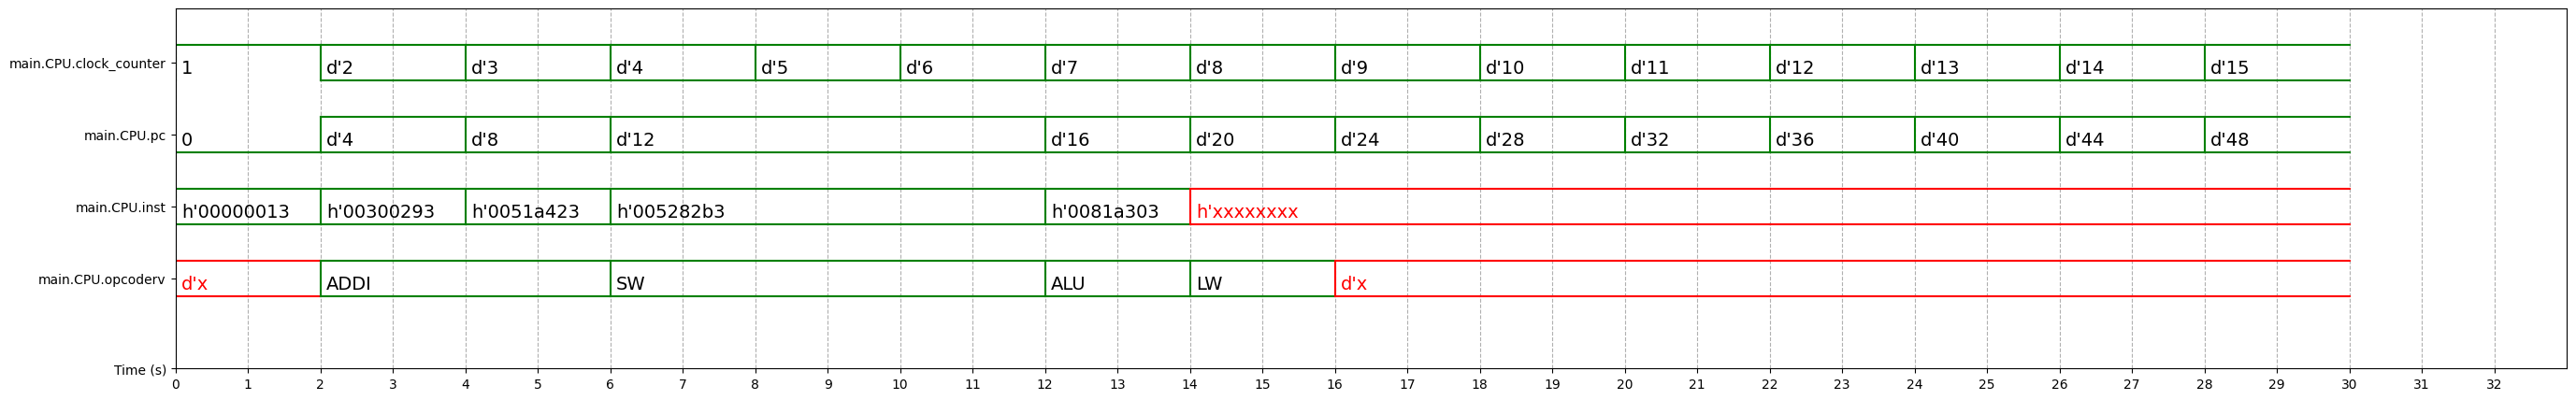

In [ ]:
%%waveform test.vcd

op_dict = [{'11':'LW', '1100011':'BEQ','110011':'ALU','100011':'SW','10011':'ADDI'}, {'10':'sp','111':'t2','1001':'s1', '1000':'s0','110':'t1','100':'tp','1':'ra','11':'gp', '101':'t0'} ]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end =32
base = 'hex' # bin, dec, dec2, hex, octal

### Final Register Bank

In [ ]:
!cat reg.data

// 0x00000000
00000000
ffffffff
00000000
00000000
00000000
00000006
00000003
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000003
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


# Testes

## Problema 1: MUL

### Teste 1 - Uma Multiplicação

    addi x1, x0, 5      # Carrega o valor 5 em x1
    addi x2, x0, 3      # Carrega o valor 3 em x2
    mul x3, x1, x2      # Multiplica x1 por x2 e armazena o resultado 15 em x3

In [ ]:
%%writefile im_data.txt
00500093
00300113
022081b3

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00500093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
00000005
00000003
0000000f
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


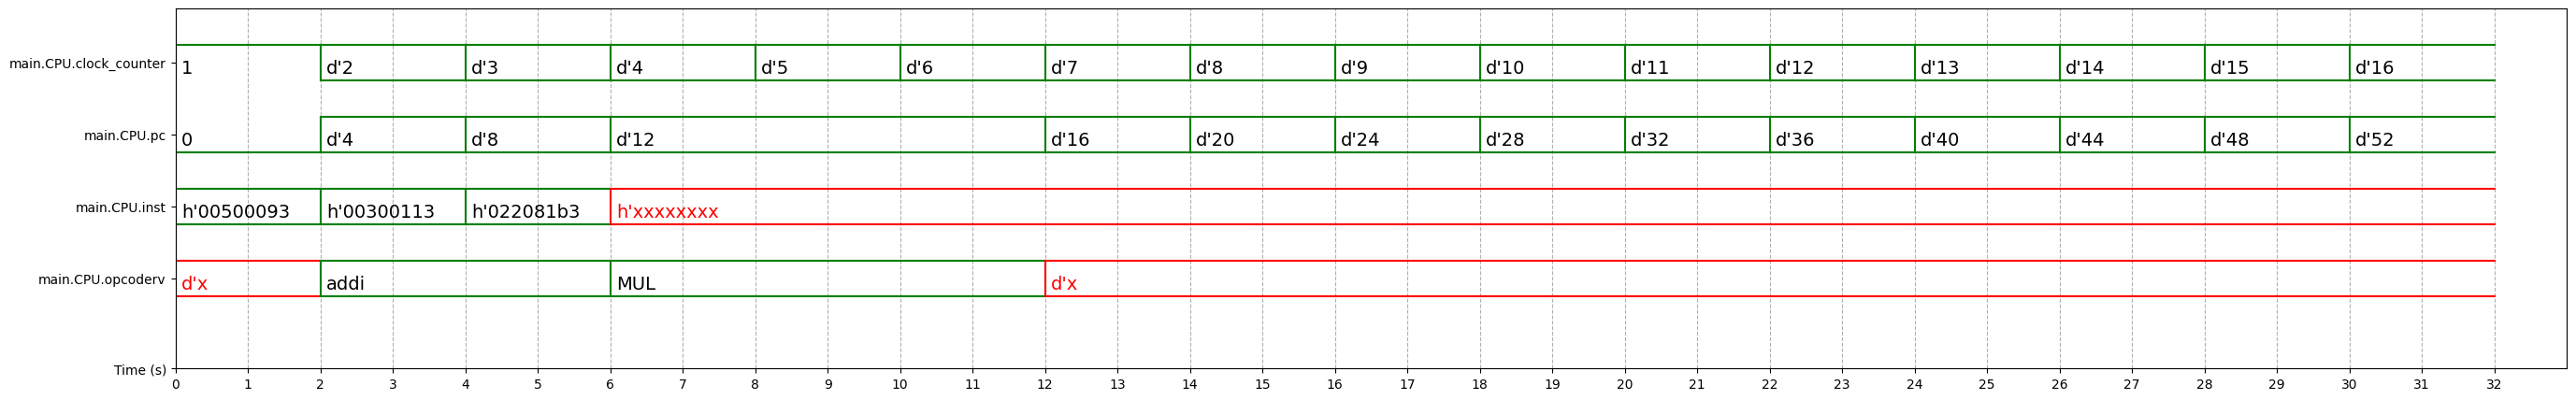

In [ ]:
%%waveform test.vcd
op_dict = [{'10011':'addi', '110011':'MUL'}, {'10':'sp','111':'t2','1001':'s1', '1000':'s0','110':'t1','100':'tp','1':'ra','11':'gp', '101':'t0'}]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end = 32
base = 'hex' # bin, dec, dec2, hex, octal

### Teste 2 - Várias Multiplicações

    addi x1, x0, 6      # Carrega o valor 6 em x1
    addi x2, x0, 9      # Carrega o valor 9 em x2
    mul x3, x1, x2      # Multiplica x1 por x2 e armazena o resultado em x3
    mul x4, x2, x3      # Multiplica x2 por x3 e armazena o resultado em x4
    mul x5, x3, x4      # Multiplica x3 por x4 e armazena o resultado em x5
    mul x6, x4, x5	  # Multiplica x4 por x5 e armazena o resultado em x6

In [ ]:
%%writefile im_data.txt
00600093
00900113
022081b3
02310233
024182b3
02520333

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00600093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
00000006
00000009
00000036
000001e6
00006684
00c29e98
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


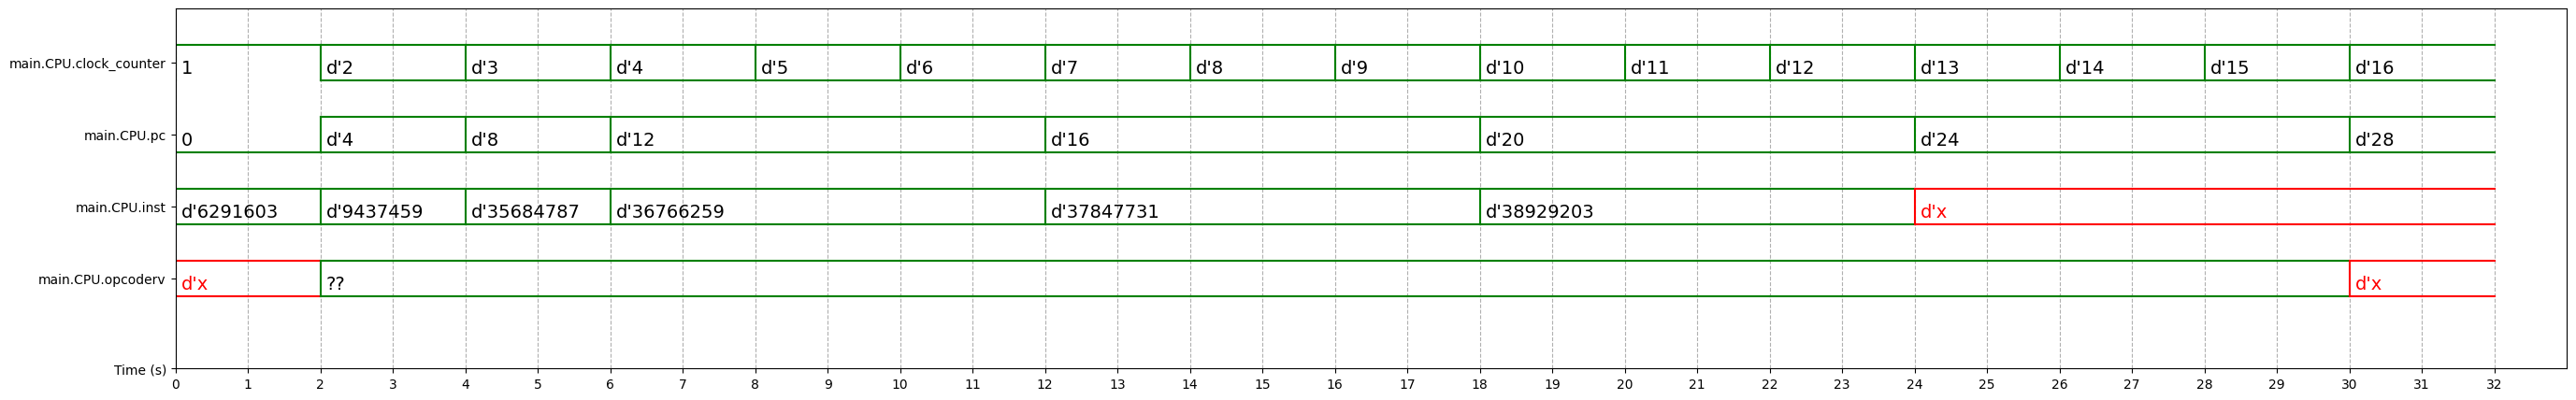

In [ ]:
%%waveform test.vcd

op_dict = [{'0110011':'mul'} ]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end =32
base = 'dec' # bin, dec, dec2, hex, octal

## Problema 2: DIV

### Teste 1 - Divisão Exata

    addi x1, x0, 2     # Carrega o valor 2 em x1
    addi x2, x0, 10    # Carrega o valor 10 em x2
    div x3, x2, x1     # Divide x2 por x1 e salva em x3

In [ ]:
%%writefile im_data.txt
00200093
00a00113
021141b3

Overwriting im_data.txt


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00200093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
00000002
0000000a
00000005
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


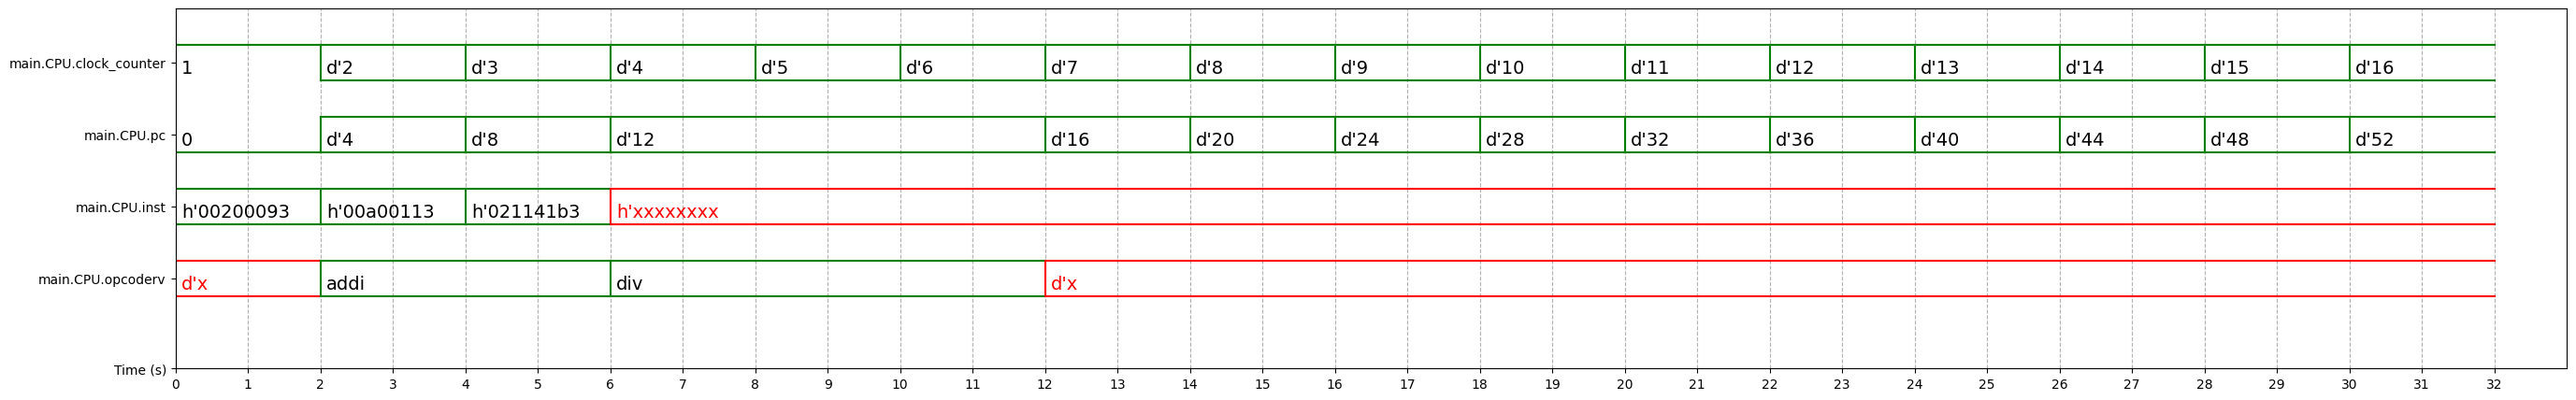

In [ ]:
%%waveform test.vcd
op_dict = [{'10011':'addi', '110011':'div'}, {'10':'sp','111':'t2','1001':'s1', '1000':'s0','110':'t1','100':'tp','1':'ra','11':'gp', '101':'t0'}]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end = 32
base = 'hex' # bin, dec, dec2, hex, octal

### Teste 2 - Divisão Quebrada

    addi x1, x0, 3     # Carrega o valor 3 em x1
    addi x2, x0, 25    # Carrega o valor 25 em x2
    div x3, x2, x1     # Divide x2 por x1 e salva em x3

In [ ]:
%%writefile im_data.txt
00300093
01900113
021141b3

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00300093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
00000003
00000019
00000008
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


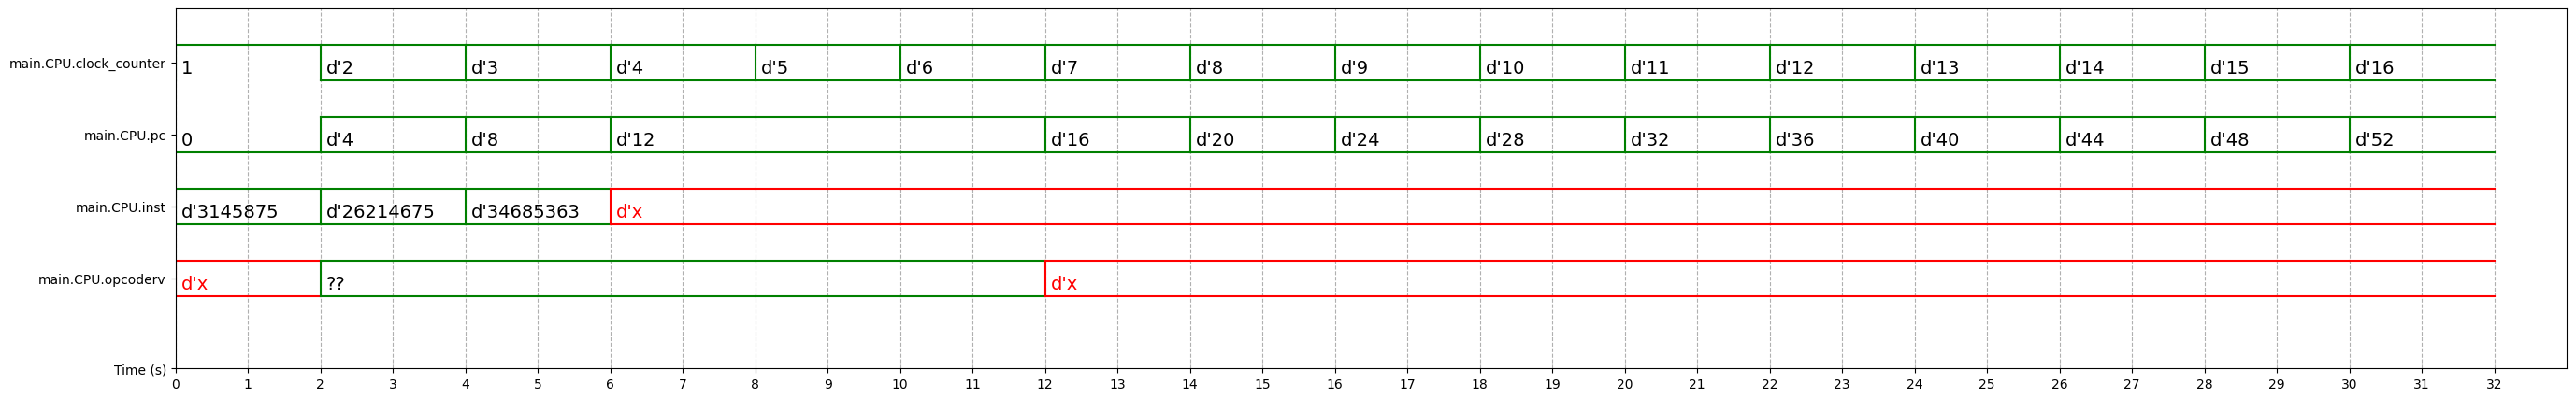

In [ ]:
%%waveform test.vcd

op_dict = [{'0110011':'div'} ]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end =32
base = 'dec' # bin, dec, dec2, hex, octal

### Teste 3 - Várias Divisões

    addi x1, x0, 2047
    addi x2, x1, 869
    addi x3, x0, 6
    addi x4, x0, 9
    addi x5, x0, 54
    addi x6, x0, 324
    div x7, x2, x3
    div x8, x2, x4
    div x9, x2, x5
    div x10, x2, x6

In [ ]:
%%writefile im_data.txt
7ff00093
36508113
00600193
00900213
03600293
14400313
023143b3
02414433
025144b3
02614533

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x7ff00093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
000007ff
00000b64
00000006
00000009
00000036
00000144
000001e6
00000144
00000036
00000009
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


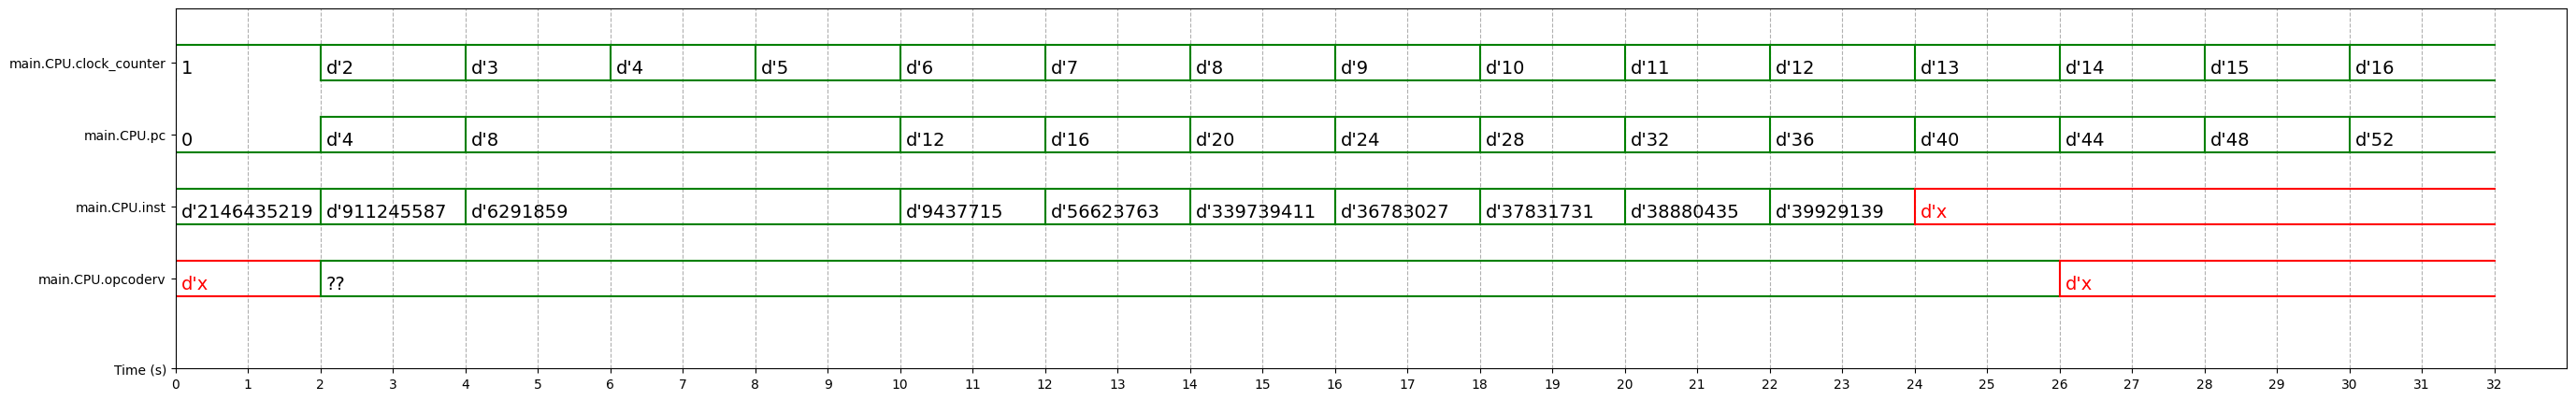

In [ ]:
%%waveform test.vcd

op_dict = [{'0110011':'div'} ]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end =32
base = 'dec' # bin, dec, dec2, hex, octal

## Problema 3: ANDI

### Teste 1 - AND e ANDI

    addi x2,x0,5    # Carrega o valor 5 em x2
    addi x3,x0,6    # Carrega o valor 6 em x2
    and x4,x2,x3    # Realiza o and x2 x3 que é 4
    andi x5,x2,6    # Realiza o andi com os valores iguais ao and

In [ ]:
%%writefile im_data.txt
00500113
00600193
00317233
00617293

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00500113 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
ffffffff
00000005
00000006
00000004
00000004
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


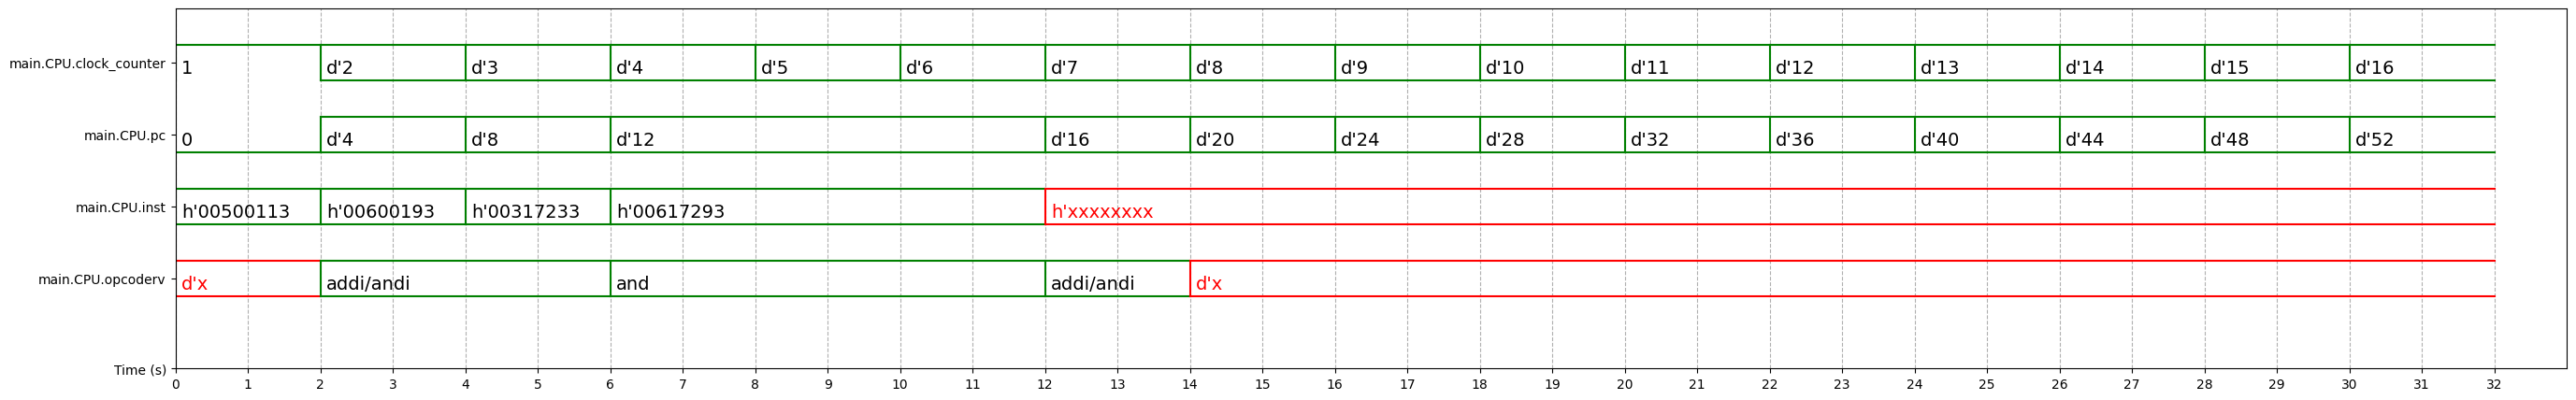

In [ ]:
%%waveform test.vcd
op_dict = [{'110011':'and', '10011': 'addi/andi'}, {'10':'sp','111':'t2','1001':'s1', '1000':'s0','110':'t1','100':'tp','1':'ra','11':'gp', '101':'t0'}]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end = 32
base = 'hex' # bin, dec, dec2, hex, octal

### Teste 2 - Zera todos os bits

    addi x1, x0, 10     # Carrega o valor 10 em x1
    andi x2, x1, 5      # faz o and de 10 com o imediato 5

In [ ]:
%%writefile im_data.txt
00a00093
0050f113

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00a00093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
0000000a
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


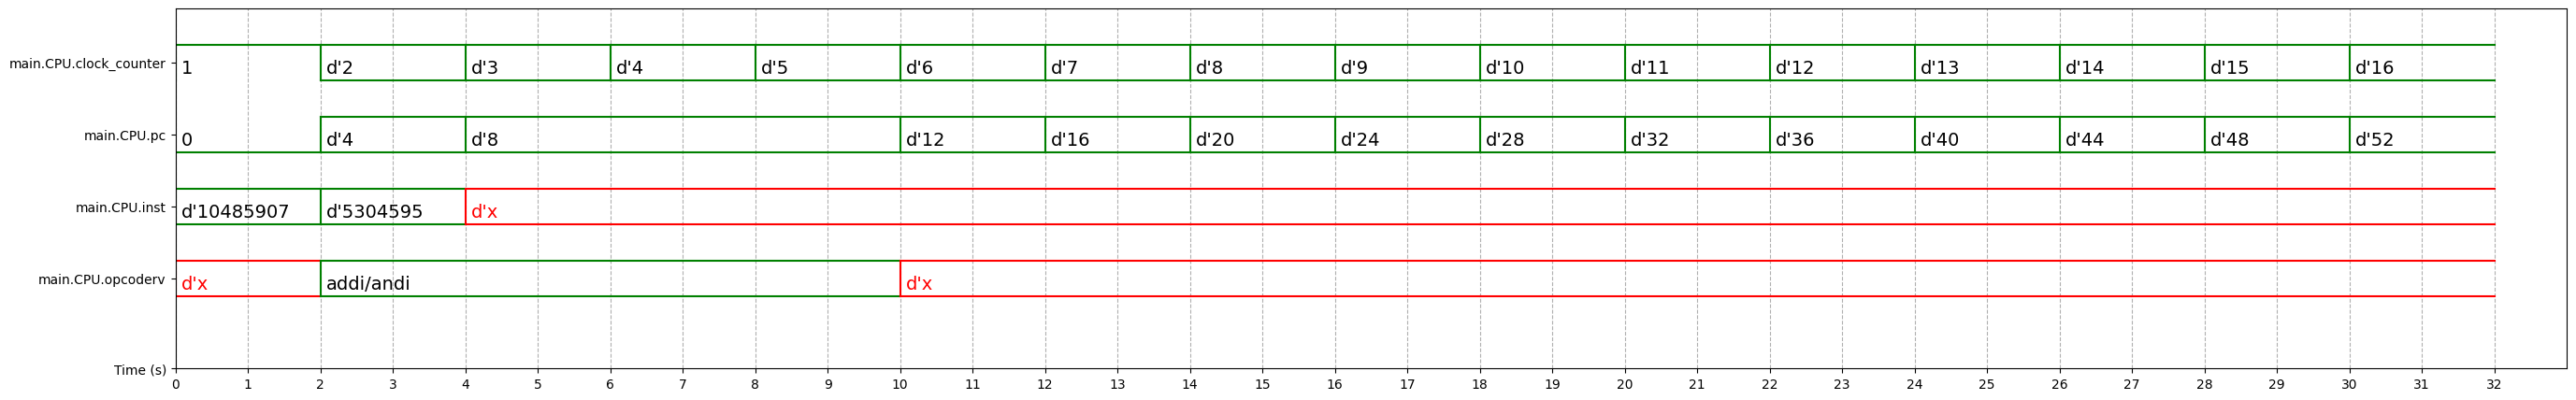

In [ ]:
%%waveform test.vcd

op_dict = [{'110011':'and','10011':'addi/andi'} ]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end =32
base = 'dec' # bin, dec, dec2, hex, octal

### Teste 3 - Vários ANDI

    addi x1, x0, 6      # Carrega o valor 9 em x1
    addi x2, x0, 9      # Carrega o valor 6 em x2
    addi x3, x0, 12     # Carrega o valor 12 em x2
    andi x4, x1, 7      # ANDI 6 e 7
    andi x5, x2, 10     # ANDI 9 e 10
    andi x6, x3, 13	 # ANDI 12 e 13


In [ ]:
%%writefile im_data.txt
00600093
00900113
00c00193
0070f213
00a17293
00d1f313

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00600093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
00000006
00000009
0000000c
00000006
00000008
0000000c
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


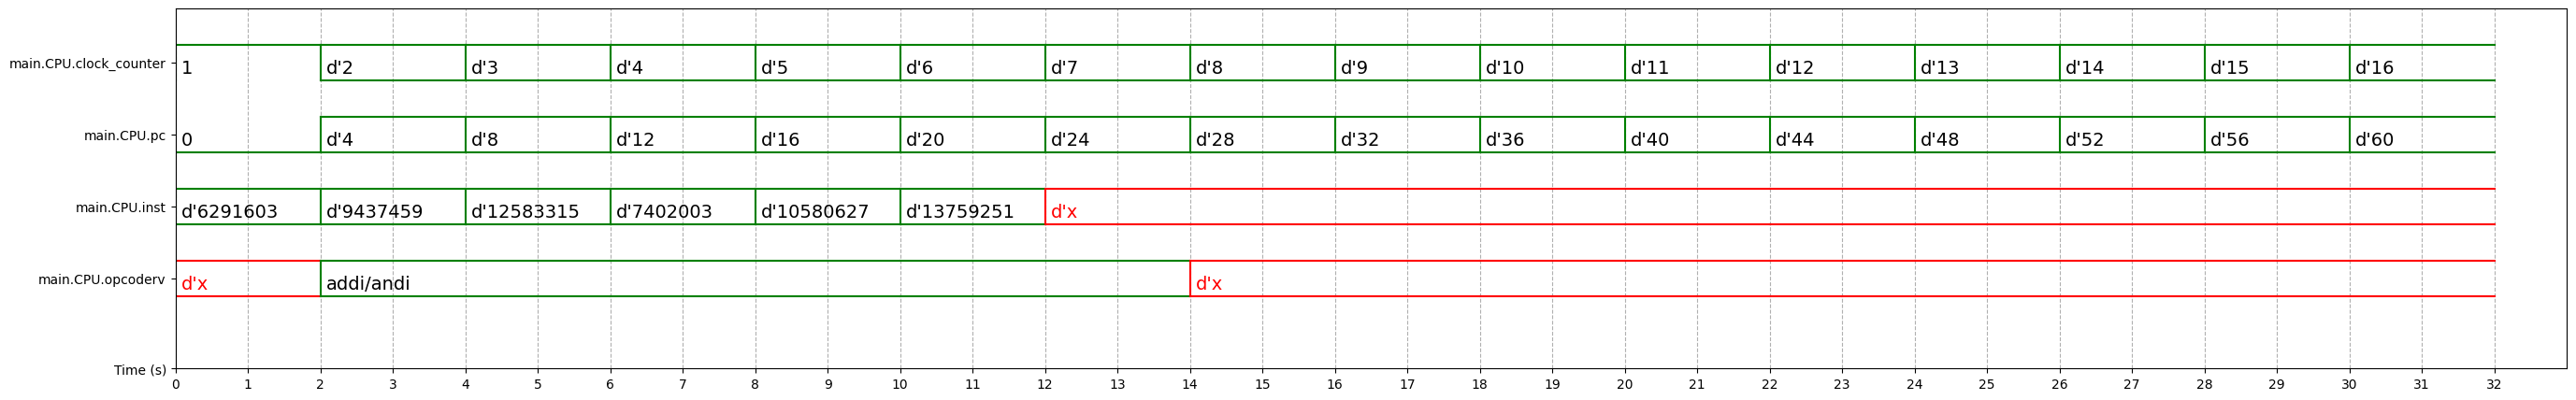

In [ ]:
%%waveform test.vcd

op_dict = [{'110011':'and','10011':'addi/andi'} ]
sign_list = [ 'main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end =32
base = 'dec' # bin, dec, dec2, hex, octal

## Problema 4: BEQ

### Teste 1 - BEQ Verdadeiro

	addi x1, x0, 10      # Carrega o valor 10 em x1
    addi x2, x0, 10      # Carrega o valor 10 em x2
    beq x1, x2, end      # Pula para a etiqueta "equal" se x1 for igual a x2
    addi x3, x0, 1       # Não executa esta instrução se a beq for verdadeira
    end:
	addi x3, x0, 2

In [ ]:
%%writefile im_data.txt
00a00093
00a00113
00208463
00100193
00200193

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00a00093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
0000000a
0000000a
00000002
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


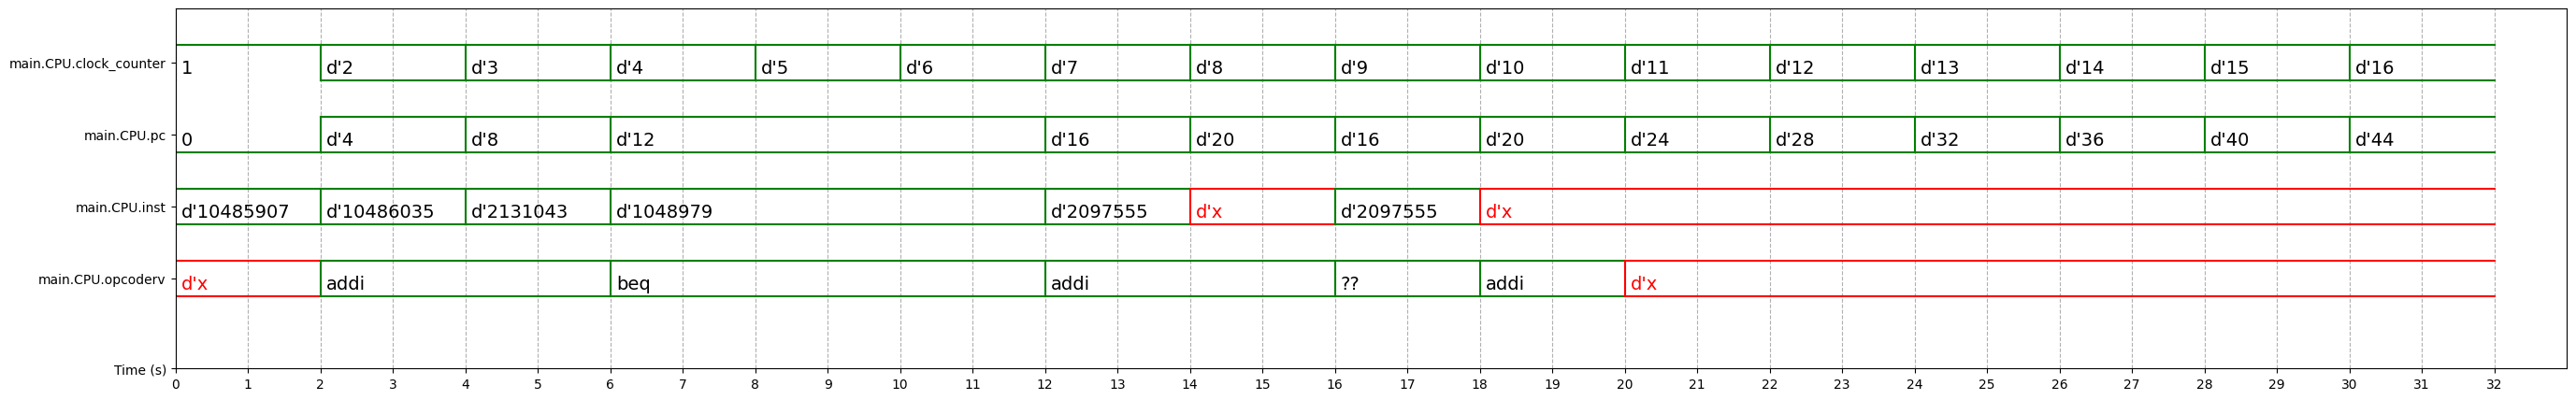

In [ ]:
%%waveform test.vcd

op_dict = [{'10011':'addi', '1100011':'beq' }, {'10':'sp','111':'t2','1001':'s1', '1000':'s0','110':'t1','100':'tp','1':'ra','11':'gp', '101':'t0'} ]
sign_list = ['main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end = 32
base = 'dec' # bin, dec, dec2, hex, octal

### Teste 2 - BEQ Falso

	addi x1, x0, 5      # Carrega o valor 5 em x1
    addi x2, x0, 10      # Carrega o valor 10 em x2
    beq x1, x2, end      # Pula para a etiqueta "equal" se x1 for igual a x2
    addi x3, x0, 1       # Não executa esta instrução se a beq for verdadeira
    end:


In [ ]:
%%writefile im_data.txt
00500093
00a00113
00208463
00100193

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00500093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
00000005
0000000a
00000001
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


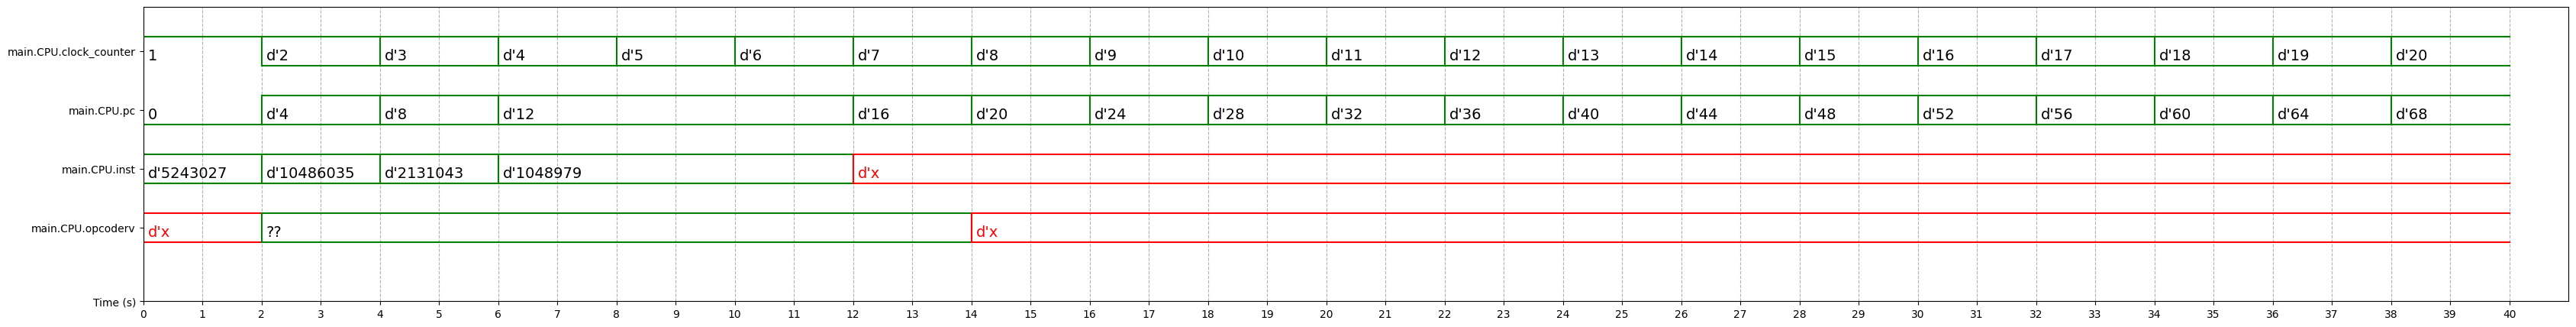

In [ ]:
%%waveform test.vcd

op_dict = [{'10':'add','110':'sub'}, {'110011':'ALU','10011':'addi','11':'Lw', '1100011':'Beq'},{'10':'sp','111':'t2','1001':'s1', '1000':'s0','110':'t1','100':'tp','1':'ra','11':'gp', '101':'t0'} ]

sign_list = ['main.CPU.clock_counter,dec', 'main.CPU.pc,dec', 'main.CPU.inst', 'main.CPU.opcoderv,r[0]']
time_begin = 0
time_end = 40
base = 'dec' # bin, dec, dec2, hex, octal

## Outros testes


### Teste funcionamento outras instruções

    addi x1,x0,15
    addi x2,x0,22
    add x3,x1,x2
    sub x4,x3,x2
    and x5,x1,x2
    or x6,x1,x2
    ori x7,x1,22
    xor x8,x7,x6



In [ ]:
%%writefile im_data.txt
00f00093
01600113
002081b3
40218233
0020f2b3
0020e333
0160e393
0063c433

Overwriting im_data.txt


In [ ]:
%%writefile clock_div_2.v
#40

Overwriting clock_div_2.v


In [ ]:
!iverilog main.v
!./a.out

./pipelineDecExec_s2.v:29: warning: Port 4 (in) of regr expects 5 bits, got 4.
./pipelineDecExec_s2.v:29:        : Padding 1 high bits of the port.
./execution_newcode.v:10: warning: Port 1 (funct) of alu_control expects 4 bits, got 5.
./execution_newcode.v:10:        : Pruning 1 high bits of the expression.
VCD info: dumpfile test.vcd opened for output.
cycle=   1        Decode         Exec                  Memory           WB

        pc |opcode xxxxxxx      |Alusrc x op x ctl  x|bx 0xxxxxxxxx   | memtoreg x
         0 | rs  |-R-| value    |A    x |--\         |jx 0xxxxxxxxx   |alu    x
inst       | x   | e |    x     |       ALU |    x   |                |mem    x
0x00f00093 | x   | g |    x     |B    x |--/         |addr    x       |
           |Im      x    f3=xxx |                    |rx    x         |wx rd  x 
pcsrc=  x  |rd=  x   f7=xxxxxxx | rd=  x             |wx    x         |       |
           |      /\            |                    |wx rd  x        |       |
           

In [ ]:
!cat reg.data

// 0x00000000
00000000
0000000f
00000016
00000025
0000000f
00000006
0000001f
0000001f
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000


In [ ]:
!cat mem.data

// 0x00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
// 0x00000010
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
00000000
